<a href="https://colab.research.google.com/github/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/bootcamp_w3_series_temporais_facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso de Series Temporais - Bootcamp Data Science Aplicada com dados de COVID-19 do Estado de São Paulo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url_github = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'

In [3]:
dados_sp = pd.read_csv(url_github, sep=';')

In [4]:
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [5]:
#precisamos transformar nossa coluna datahora em datetime type
dados_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     286178 non-null  object 
 1   codigo_ibge    286178 non-null  int64  
 2   dia            286178 non-null  int64  
 3   mes            286178 non-null  int64  
 4   datahora       286178 non-null  object 
 5   casos          286178 non-null  int64  
 6   casos_novos    286178 non-null  int64  
 7   casos_pc       286178 non-null  object 
 8   casos_mm7d     286178 non-null  object 
 9   obitos         286178 non-null  int64  
 10  obitos_novos   286178 non-null  int64  
 11  obitos_pc      286178 non-null  object 
 12  obitos_mm7d    286178 non-null  object 
 13  letalidade     286178 non-null  object 
 14  nome_ra        285735 non-null  object 
 15  cod_ra         286178 non-null  int64  
 16  nome_drs       285735 non-null  object 
 17  cod_drs        286178 non-nul

In [6]:
dados_sp['datahora'] = pd.to_datetime(dados_sp['datahora'], format='%Y-%m-%d') #o y de Year deve sem em maiúsculo os outros não - desconheço a razão

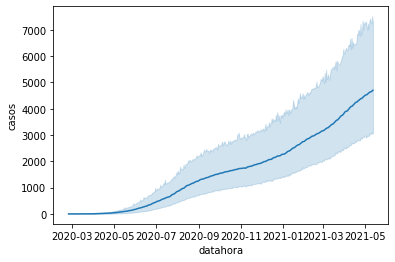

In [7]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')

A reflexão inicial é que aparentemente os casos parecem ter crescimento exponencial.

Para testar isso vamos ver aplicar a escala do eixo Y para Log. A teoria diz o seguinte:

"Numa curva exponencial quando aplicado um log de x, o resultado é o próprio X, ou seja, uma reta perfeita"

Assim sendo, caso aplicando escala Log no eixo y ou seja, plotando os casos em Log, tivermos uma reta teremos então confirmado que os casos estão crescendo de forma exponencial. 

In [8]:
#filtrando com o query
dados_sp.query('nome_munic == "São Paulo"')
#filtrando da forma que to mais acostumado  - e respondendo ao primeiro desafio
dados_capital = dados_sp[dados_sp['nome_munic'] == 'São Paulo']

In [9]:
#cofigurando os padrões do Matplotlib para não ficarmos toda hora tendo que colocar
import matplotlib as mlt
import matplotlib.pyplot as plt
mlt.rcParams['font.size'] = 18
mlt.rcParams['figure.figsize'] = (20,8)

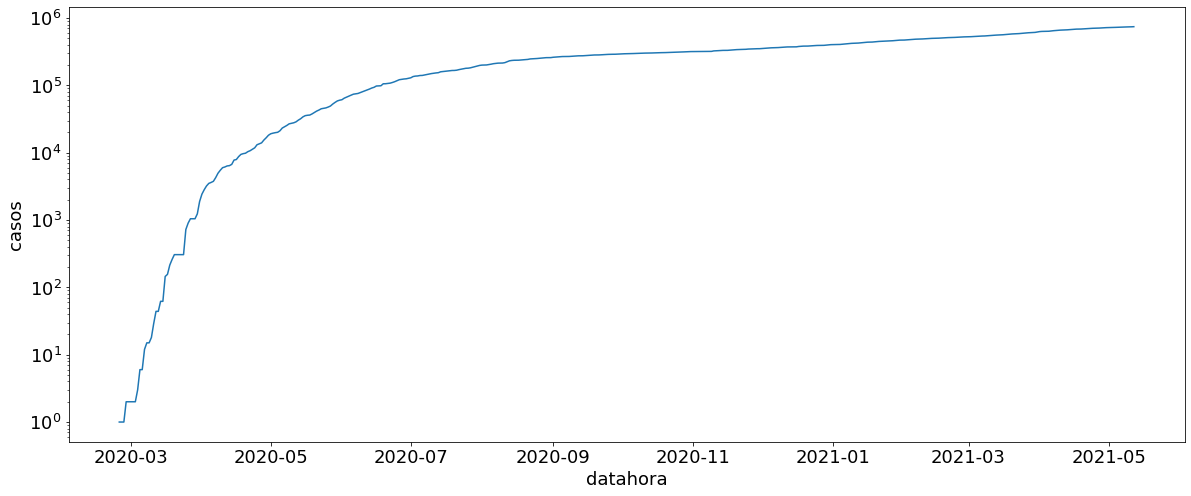

In [10]:
sns.lineplot(data=dados_capital, x='datahora', y='casos')

plt.yscale('log')

plt.show()

Podemos ver duas coisas principais no gráfico monolog:

- No começo temos sim um crescimento com uma reta, que indica crescimento exponencial;
- Mas depois essa reta se achata para uma forma mais de lado, que indica mudança no padrão de crescimento e também porque uma aceleração de log5 para log6 tem que ser muito grande, já uma grande distância.

###Desafio 2 - aula 1.1
---
Escolher outro município para fazer a análise.


In [11]:
franca_covid = dados_sp.query('nome_munic == "Franca"')
franca_covid.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
185      Franca      3516200   25  ...  -20,5352  -47,4039              9
830      Franca      3516200   26  ...  -20,5352  -47,4039              9
1475     Franca      3516200   27  ...  -20,5352  -47,4039              9
2120     Franca      3516200   28  ...  -20,5352  -47,4039              9
2765     Franca      3516200   29  ...  -20,5352  -47,4039              9

[5 rows x 26 columns]

##Aula 1.2

---
Casos diários e média móvel


###Desafio1: Deixar o notebook sem warnings - Não há nenhum mais.

In [12]:
#começando observando os casos diários
dados_capital.head(1)

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
562  São Paulo      3550308   25  ...  -23,5329  -46,6395              9

[1 rows x 26 columns]

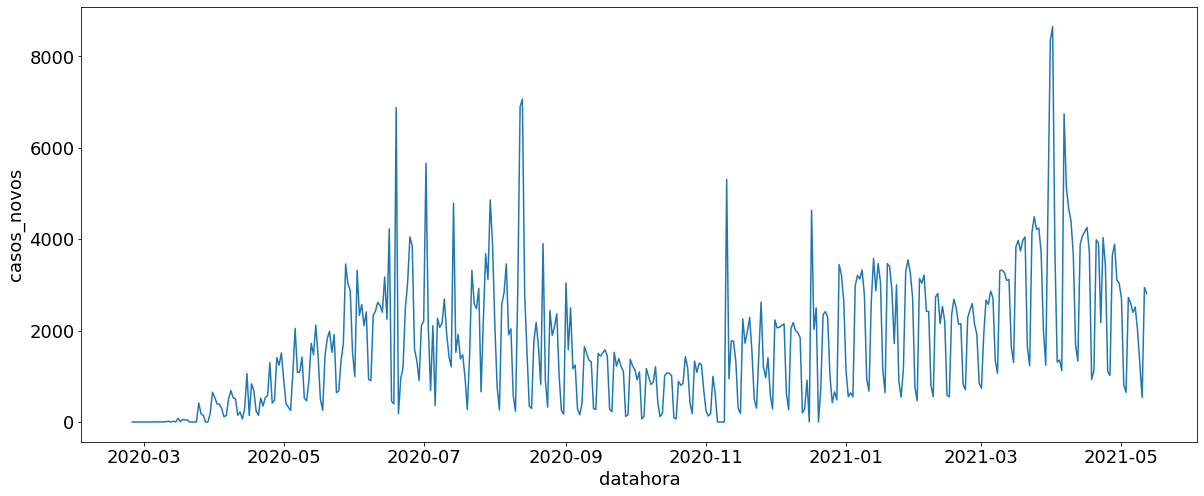

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dados_capital, x='datahora', y='casos_novos')

Apenas olhando esse gráfico dos reports diários de casos não conseguimos identificar claramente se os casos estão crescendo ou não.

Para melhor compreender isso vamos criar colunas de diferenciação, ou seja, uma taxa de crescimento - diferenciação signifca calcular qual a taxa que gera o próximo valor ou seja a diferença entre eles.

In [14]:
#adicionando a coluna na copia para evitar erros de assignment
dados_capital_copy = dados_capital.copy()
dados_capital_copy.loc[:, 'taxa_crescimento_casos'] = dados_capital['casos_novos'].diff()
dados_capital_copy.loc[:, 'taxa_crescimento_obitos'] = dados_capital['obitos_novos'].diff()

In [15]:
dados_capital_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 562 to 285652
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   nome_munic               443 non-null    object        
 1   codigo_ibge              443 non-null    int64         
 2   dia                      443 non-null    int64         
 3   mes                      443 non-null    int64         
 4   datahora                 443 non-null    datetime64[ns]
 5   casos                    443 non-null    int64         
 6   casos_novos              443 non-null    int64         
 7   casos_pc                 443 non-null    object        
 8   casos_mm7d               443 non-null    object        
 9   obitos                   443 non-null    int64         
 10  obitos_novos             443 non-null    int64         
 11  obitos_pc                443 non-null    object        
 12  obitos_mm7d              443 no

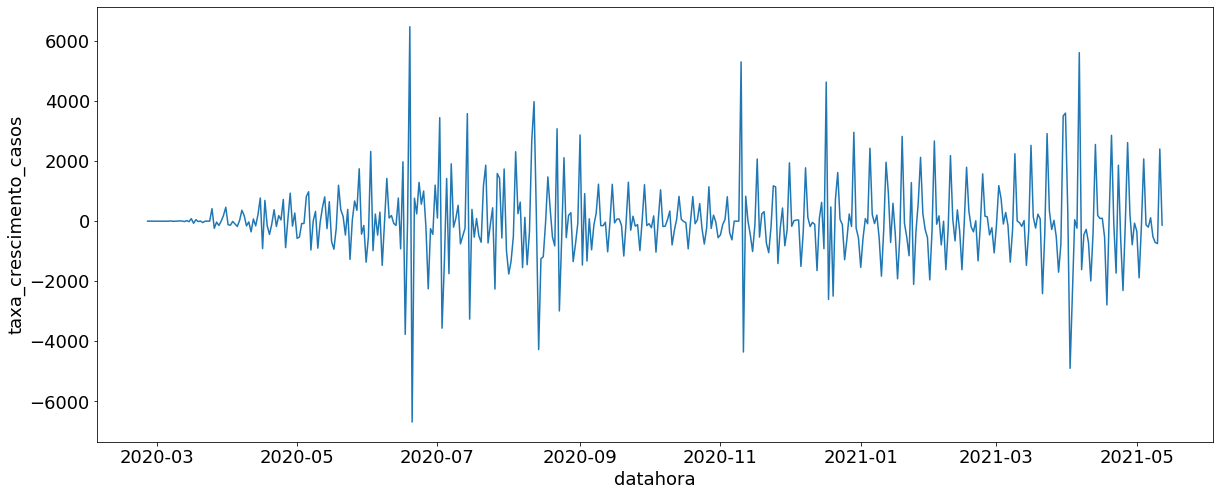

In [16]:
#plotando como linha
plt.figure(figsize=(20,8))
sns.lineplot(data=dados_capital_copy, x='datahora', y='taxa_crescimento_casos')

<BarContainer object of 443 artists>

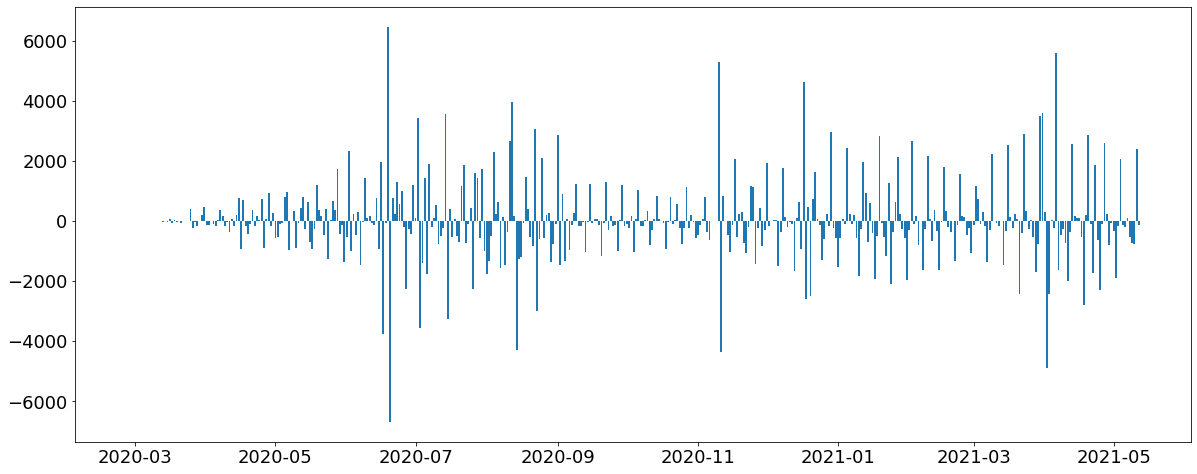

In [17]:
#Porém é melhor plotarmos como barra porque como é uma taxa, não temos como definir o que é o que entre um ponto e outro, melhor como barra
plt.figure(figsize=(20,8))
plt.bar(x='datahora', height='taxa_crescimento_casos', data=dados_capital_copy)

In [18]:
#vamos observar somente para 2021 agora para conseguir melhor visualizar os dados
dados_capital_copy['year'] = pd.DatetimeIndex(dados_capital_copy['datahora']).year

In [19]:
dados_capital_copy21 = dados_capital_copy[dados_capital_copy['year'] == 2021]

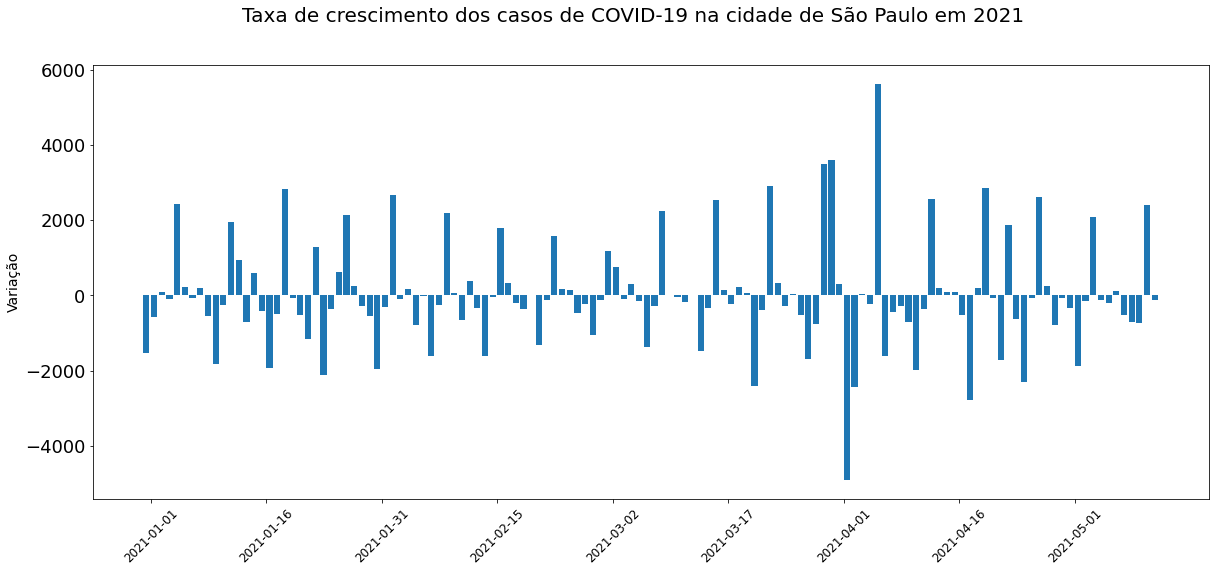

In [20]:
import matplotlib.ticker as ticker
ax = plt.subplot()

ax.bar(x='datahora', height='taxa_crescimento_casos', data=dados_capital_copy21)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.set_ylabel('Variação', fontsize=14)

plt.suptitle('Taxa de crescimento dos casos de COVID-19 na cidade de São Paulo em 2021', fontsize=20)
plt.show()

Entendida a taxa de crescimento, é importante também plotarmos a média móvel, que nada mais é que a média dada em determinado período.

Ela é importante para suavizarmos efeitos de dias com picos muito altos e outliers nos novos casos.

Para essa observação plotaremos a média móvel de 7 dias (uma semana) com o registro da média no final da semana e não no centro. 

In [21]:
#criando nova coluna da média móvel na capital
#podemos criar essa coluna usando uma combinação do método 'rolling' com o 'mean',
# O rolling criar a janela de valores e o mean calcula a média sobre ele.
dados_capital_copy21 = dados_capital_copy21.copy()
dados_capital_copy21.loc[:,('media_movel_7_casos')] = dados_capital_copy21['casos_novos'].rolling(window=7, center=False).mean()
dados_capital_copy21.loc[:,('media_movel_7_obitos')] = dados_capital_copy21['obitos_novos'].rolling(window=7, center=False).mean()

In [22]:
dados_capital_copy21.head(20)

nome_munic  codigo_ibge  ...  media_movel_7_casos  media_movel_7_obitos
201157  São Paulo      3550308  ...                  NaN                   NaN
201802  São Paulo      3550308  ...                  NaN                   NaN
202447  São Paulo      3550308  ...                  NaN                   NaN
203092  São Paulo      3550308  ...                  NaN                   NaN
203737  São Paulo      3550308  ...                  NaN                   NaN
204382  São Paulo      3550308  ...                  NaN                   NaN
205027  São Paulo      3550308  ...          1739.142857             41.571429
205672  São Paulo      3550308  ...          2055.142857             49.285714
206317  São Paulo      3550308  ...          2372.571429             56.714286
206962  São Paulo      3550308  ...          2416.285714             57.857143
207607  São Paulo      3550308  ...          2434.000000             57.000000
208252  São Paulo      3550308  ...          2385.000000             53.142857
208897  São Paulo      3550308  ...          2438.142857             54.428571
209542  São Paulo      3550308  ...          2401.428571             59.714286
210187  São Paulo      3550308  ...          2421.000000             63.714286
210832  São Paulo      3550308  ...          2461.857143             64.000000
211477  São Paulo      3550308  ...          2490.000000             64.285714
212122  São Paulo      3550308  ...          2485.285714             64.285714
212767  São Paulo      3550308  ...          2603.571429             65.571429
213412  São Paulo      3550308  ...          2577.714286             68.714286

[20 rows x 31 columns]

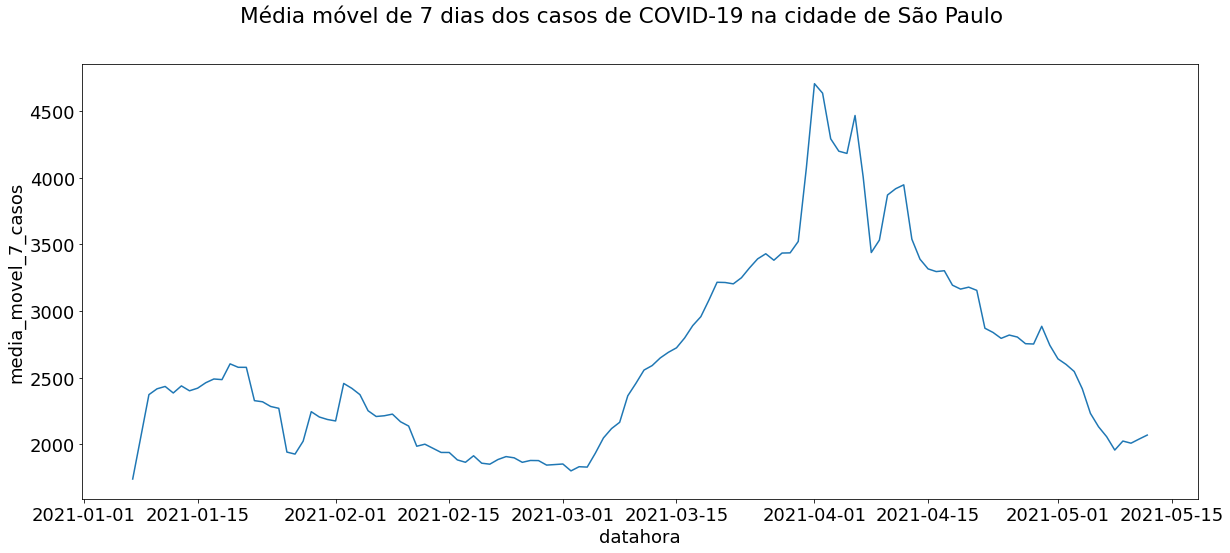

In [23]:
#agora vamos plotar a média movel e depois a media movel junto à taxa de crescimento
sns.lineplot(data=dados_capital_copy21, x='datahora', y='media_movel_7_casos')

plt.suptitle('Média móvel de 7 dias dos casos de COVID-19 na cidade de São Paulo')
plt.show()

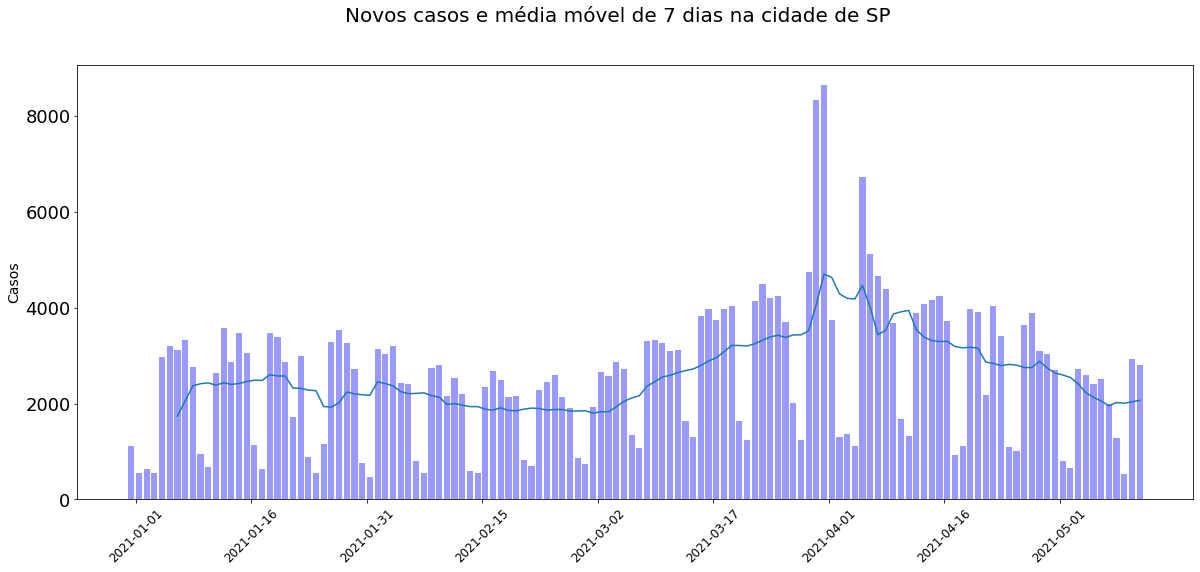

In [24]:
#plotando os novos casos e a média móvel
ax = plt.subplot()
ax.bar(data=dados_capital_copy21, x='datahora', height='casos_novos', color='blue', alpha=0.4)
sns.lineplot(ax= ax, data=dados_capital_copy21, x='datahora', y='media_movel_7_casos')

ax.xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.set_ylabel('Casos', fontsize=14)
ax.set_xlabel(None)

plt.suptitle('Novos casos e média móvel de 7 dias na cidade de SP', fontsize=20)
plt.show()

###Desafio 2: O pico da taxa de óbitos coincide com o pico da taxa de casos?

In [25]:
dados_capital_copy21.head(10)

nome_munic  codigo_ibge  ...  media_movel_7_casos  media_movel_7_obitos
201157  São Paulo      3550308  ...                  NaN                   NaN
201802  São Paulo      3550308  ...                  NaN                   NaN
202447  São Paulo      3550308  ...                  NaN                   NaN
203092  São Paulo      3550308  ...                  NaN                   NaN
203737  São Paulo      3550308  ...                  NaN                   NaN
204382  São Paulo      3550308  ...                  NaN                   NaN
205027  São Paulo      3550308  ...          1739.142857             41.571429
205672  São Paulo      3550308  ...          2055.142857             49.285714
206317  São Paulo      3550308  ...          2372.571429             56.714286
206962  São Paulo      3550308  ...          2416.285714             57.857143

[10 rows x 31 columns]

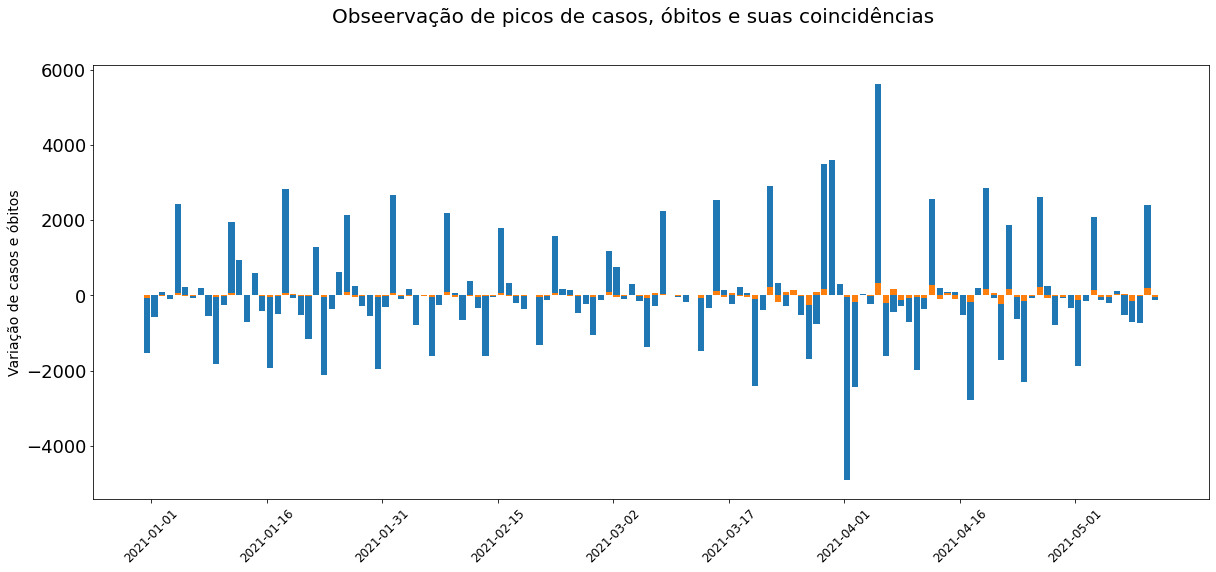

In [26]:
ax = plt.subplot()

ax.bar(data=dados_capital_copy21, x='datahora', height='taxa_crescimento_casos')
ax.bar(data=dados_capital_copy21, x='datahora', height='taxa_crescimento_obitos')

ax.xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.set_ylabel('Variação de casos e óbitos', fontsize=14)
ax.set_xlabel(None)

plt.suptitle('Obseervação de picos de casos, óbitos e suas coincidências', fontsize=20)
plt.show()

###Desafio 4: Plotar o gráfico da média móvel de óbitos.

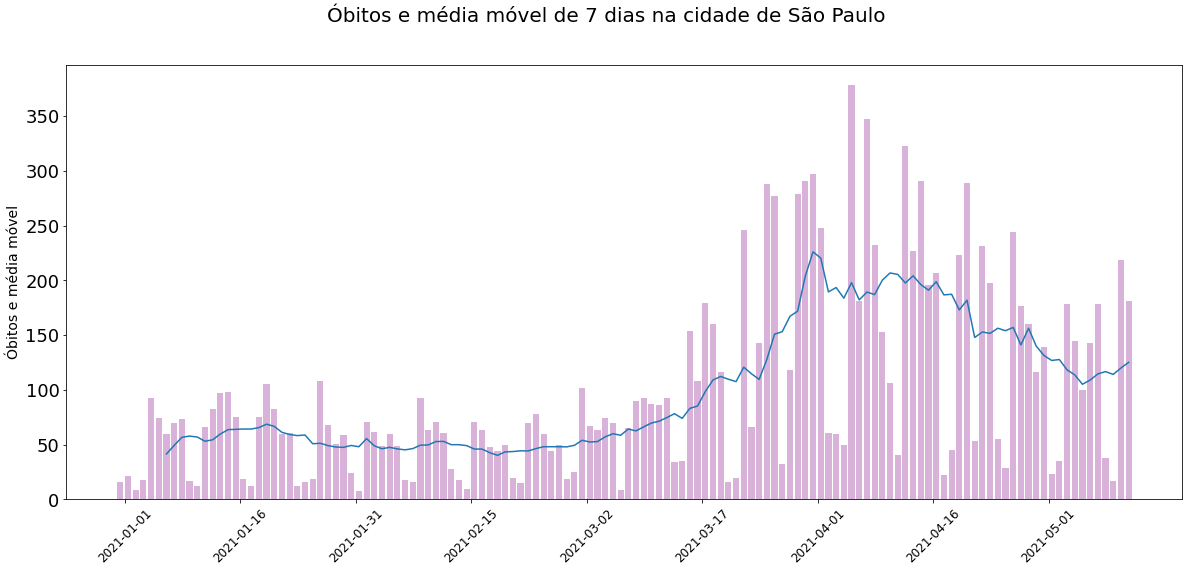

In [27]:
ax = plt.subplot()

ax.bar(data=dados_capital_copy21, x='datahora', height='obitos_novos', color='purple', alpha=0.3)
sns.lineplot(x='datahora', y='media_movel_7_obitos', data=dados_capital_copy21, alpha=2)

ax.xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.set_ylabel('Óbitos e média móvel', fontsize=14)
ax.set_xlabel(None)

plt.suptitle('Óbitos e média móvel de 7 dias na cidade de São Paulo', fontsize=20)
plt.show()

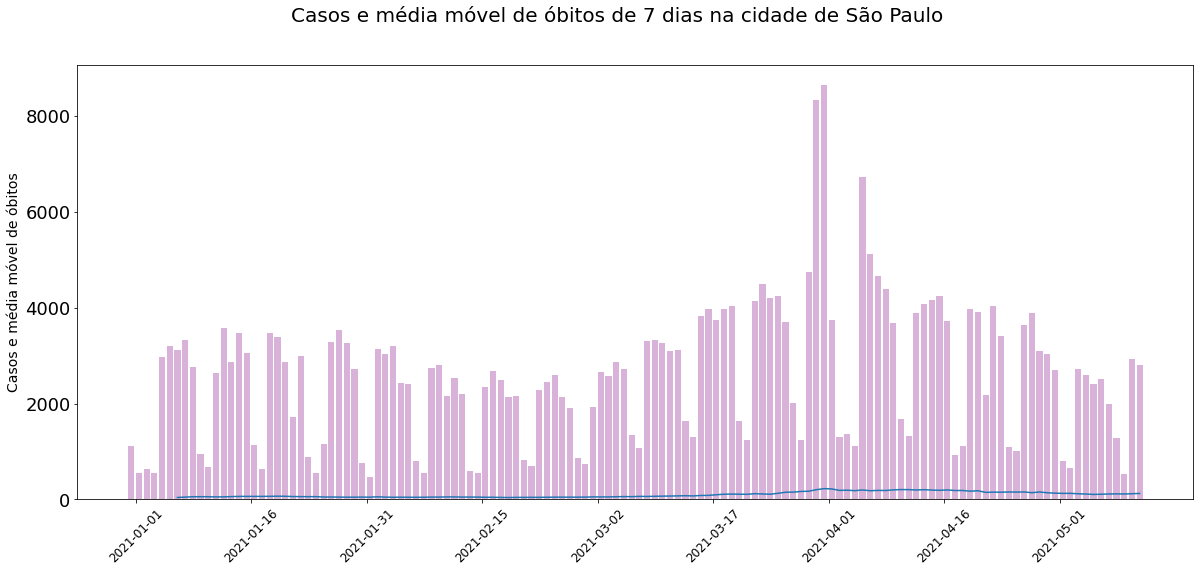

In [28]:
ax = plt.subplot()

ax.bar(data=dados_capital_copy21, x='datahora', height='casos_novos', color='purple', alpha=0.3)
sns.lineplot(x='datahora', y='media_movel_7_obitos', data=dados_capital_copy21, alpha=2)

ax.xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.set_ylabel('Casos e média móvel de óbitos', fontsize=14)
ax.set_xlabel(None)

plt.suptitle('Casos e média móvel de óbitos de 7 dias na cidade de São Paulo', fontsize=20)
plt.show()

###Desafio 5: Mover os óbitos alguns dias para verificar mudanças no gráfico

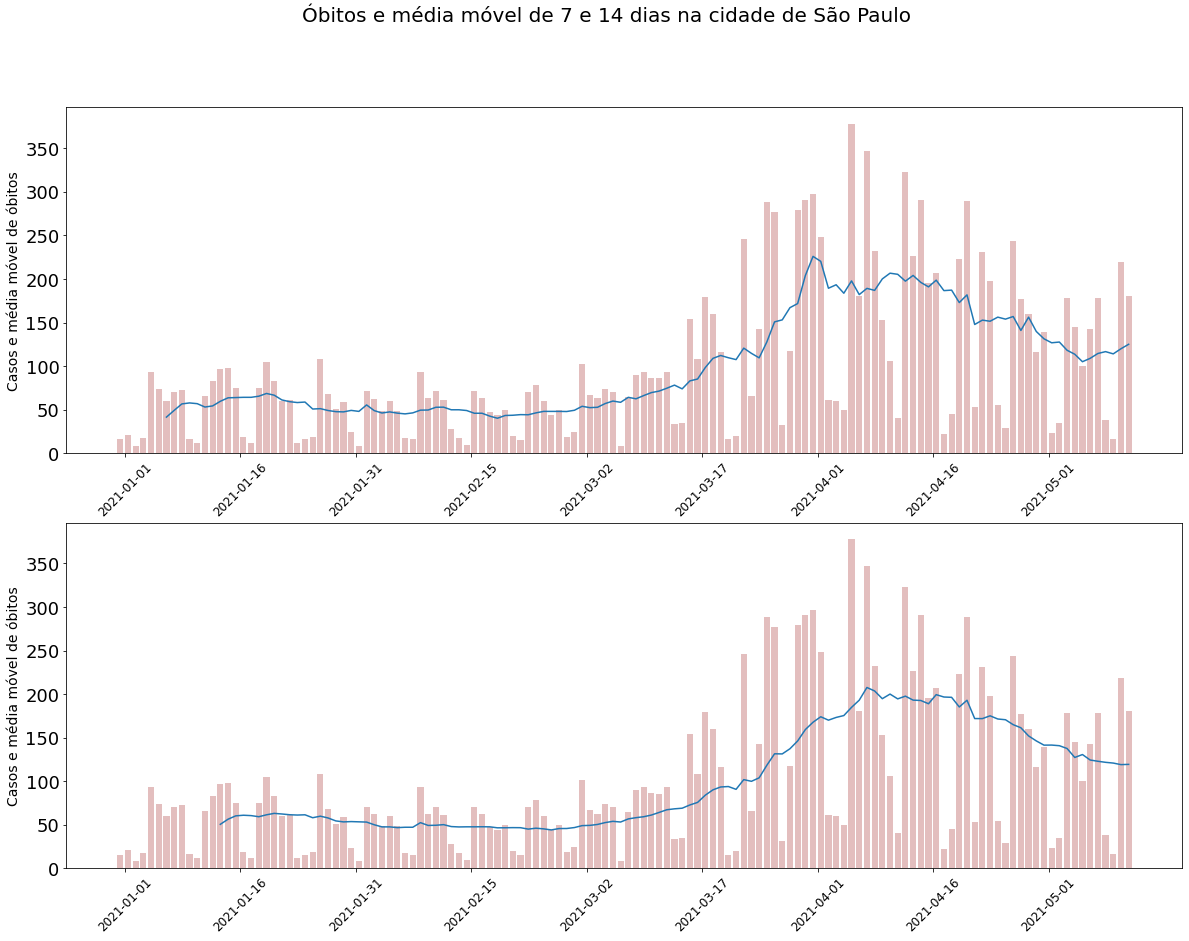

In [29]:
#adicionando a média móvel de 14 dias para as mortes e observando diferenças
fig, ax = plt.subplots(2,1, sharex=False, sharey=False, figsize=(20,14))

dados_capital_copy21 = dados_capital_copy21.copy()
dados_capital_copy21['media_movel_14_obitos'] = dados_capital_copy21['obitos_novos'].rolling(14, center=False).mean()

ax[0].bar(x='datahora', height='obitos_novos', data=dados_capital_copy21, alpha=0.3, color='brown')
sns.lineplot(ax=ax[0], x='datahora', y='media_movel_7_obitos', data=dados_capital_copy21, alpha=2)
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax[0].tick_params(axis='x', labelrotation=45, labelsize=12)
ax[0].set_ylabel('Casos e média móvel de óbitos', fontsize=14)
ax[0].set_xlabel(None)



ax[1].bar(x='datahora', height='obitos_novos', data=dados_capital_copy21, alpha=0.3, color='brown')
sns.lineplot(ax=ax[1], x='datahora', y='media_movel_14_obitos', data=dados_capital_copy21, alpha=2)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=1))
ax[1].tick_params(axis='x', labelrotation=45, labelsize=12)
ax[1].set_ylabel('Casos e média móvel de óbitos', fontsize=14)
ax[1].set_xlabel(None)

plt.suptitle('Óbitos e média móvel de 7 e 14 dias na cidade de São Paulo', fontsize=20)
plt.show()

##Aula 1.3

---
Correlação e funções de autocorrelação


Nessa aula vamos observar a sazonalidade dos nossos dados e como podemos confirmá-la através do tempo com a função de autocorrelação.

In [30]:
#observando a distribuição dos casos diários novamente
dados_capital_copy = dados_capital_copy.copy()
dados_capital_copy.loc[:,('media_movel_7_casos')] = dados_capital_copy['casos_novos'].rolling(window=7, center=False).mean()
dados_capital_copy.loc[:,('media_movel_7_obitos')] = dados_capital_copy['obitos_novos'].rolling(window=7, center=False).mean()

In [31]:
dados_capital_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 562 to 285652
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   nome_munic               443 non-null    object        
 1   codigo_ibge              443 non-null    int64         
 2   dia                      443 non-null    int64         
 3   mes                      443 non-null    int64         
 4   datahora                 443 non-null    datetime64[ns]
 5   casos                    443 non-null    int64         
 6   casos_novos              443 non-null    int64         
 7   casos_pc                 443 non-null    object        
 8   casos_mm7d               443 non-null    object        
 9   obitos                   443 non-null    int64         
 10  obitos_novos             443 non-null    int64         
 11  obitos_pc                443 non-null    object        
 12  obitos_mm7d              443 no

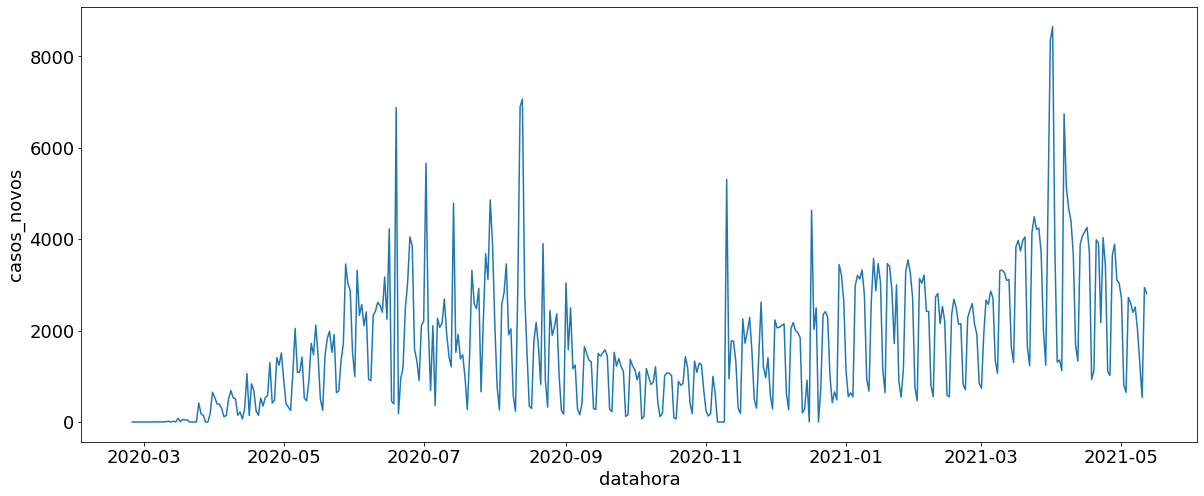

In [32]:
sns.lineplot(data=dados_capital_copy, x='datahora', y='casos_novos')

<BarContainer object of 31 artists>

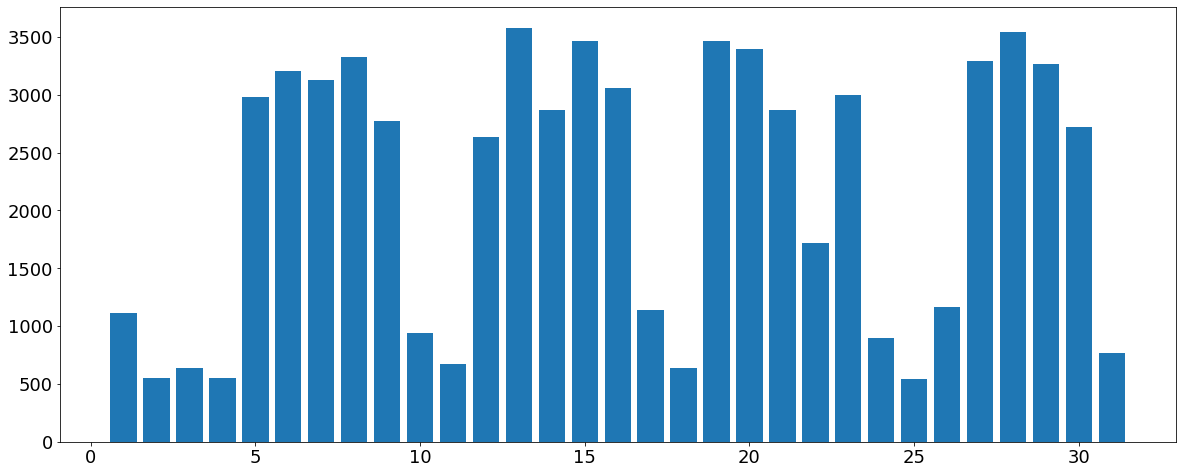

In [33]:
#vamos plotar a observação para apenas alguns meses para entendermos se à sazonalidade nesse espaço de tempo
#plot para Janeiro de 2021
dados_capital_copy21_jan = dados_capital_copy21.query('mes==1')
plt.bar(x=np.linspace(1,31,31), height=dados_capital_copy21_jan['casos_novos'])

<BarContainer object of 31 artists>

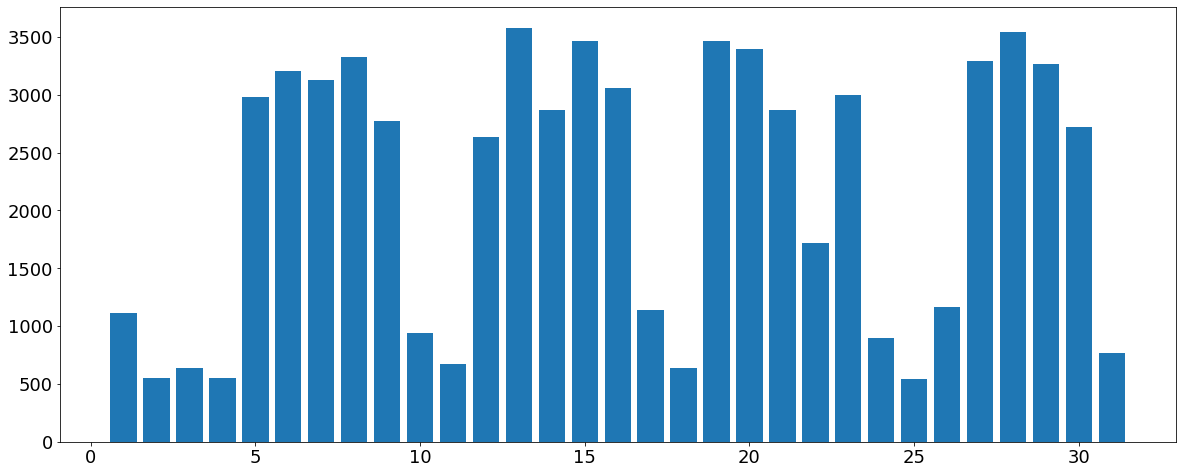

In [34]:
#utilizando a coluna dia que já estava no dataframe ao invés do linspace
plt.bar(x=dados_capital_copy21_jan['dia'], height=dados_capital_copy21_jan['casos_novos'])

Reforçar uma segunda sazonalidade dos dados - em 25/01 foi feriado, e também há subnotificações dos casos como nos finais de semana.

<BarContainer object of 28 artists>

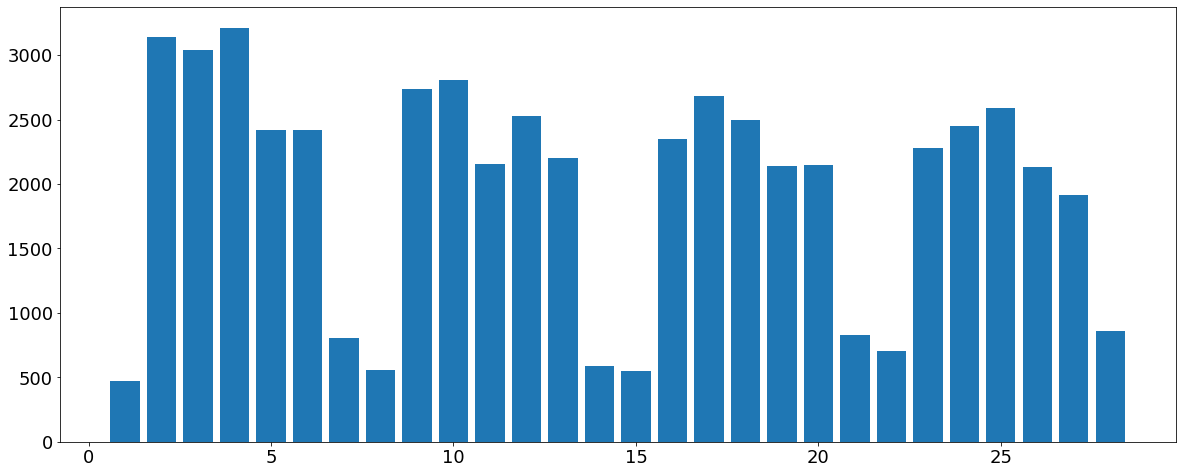

In [35]:
#plot para Fevereiro de 2021
dados_capital_copy21_fev = dados_capital_copy21[dados_capital_copy21['mes'] == 2]
plt.bar(x=np.linspace(1,28,28), height=dados_capital_copy21_fev['casos_novos'])

In [36]:
#para confirmarmos a sazonalidade dos dados podemos plotar uma função de autocorrelação que calcula uma correlação dela mesma para os lags dos dados
#temos ela por padrão no Pandas
from pandas.plotting import autocorrelation_plot

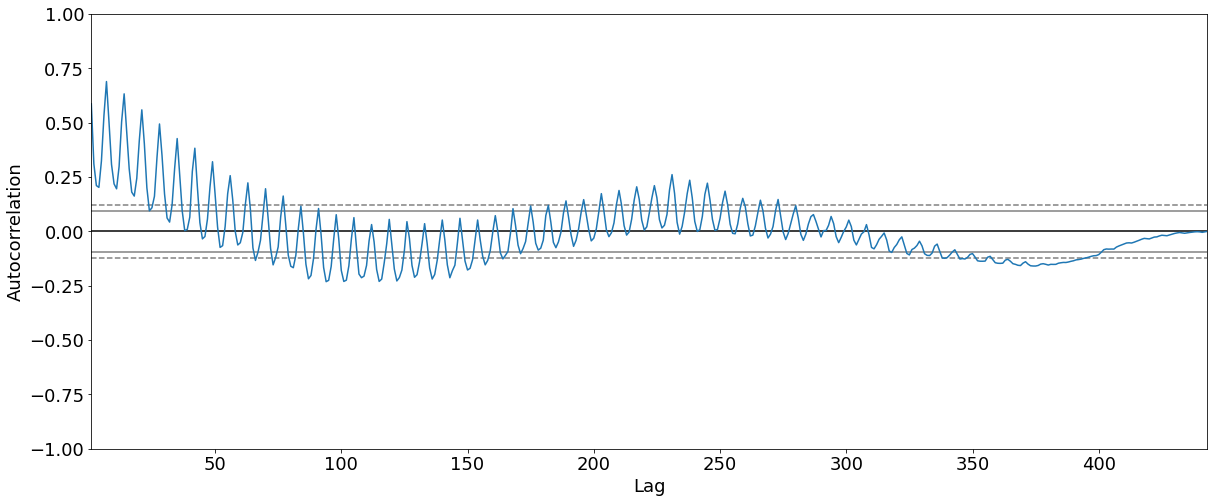

In [37]:
#plotando a autocorrelação
autocorrelation_plot(dados_capital_copy['casos_novos'])
plt.grid()
plt.show()

Conclusão desse gráfico, quanto maior a correlação maior a sazonalidade temporal.

Portanto podemos ver que no início da pandemia havia maiores padrões na distribuição dos casos e com o passar do tempo essa sazonalidade padrão diminui (está próxima de zero).

###Desafio 6: Função de correlação cruzada de casos e óbitos

In [38]:
#importando a cross-correlation function da biblioteca statsmodel
from statsmodels.tsa.stattools import ccf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


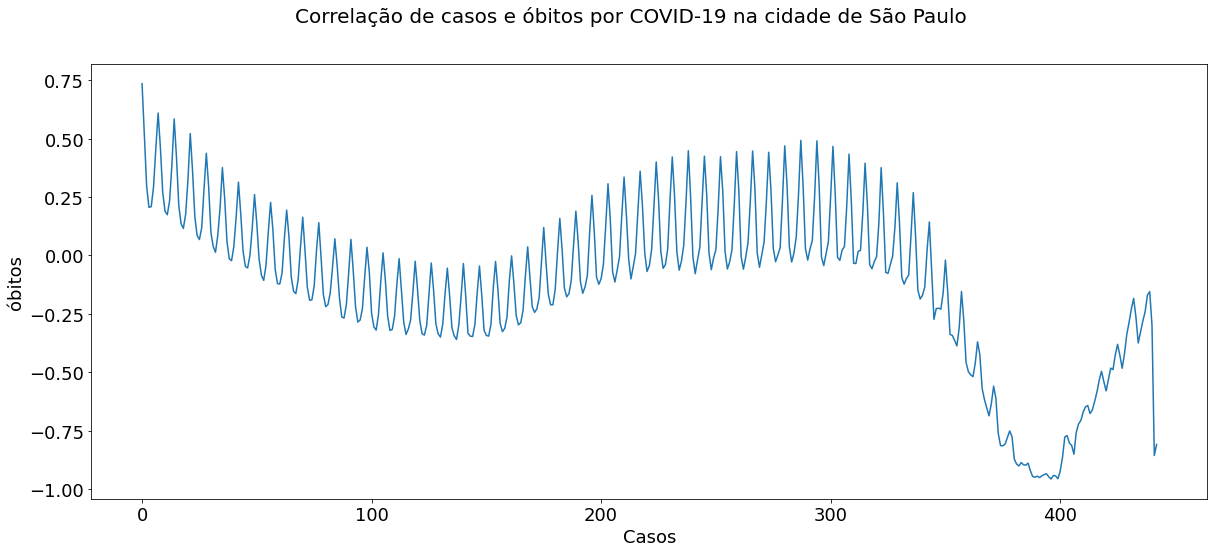

In [39]:
correlation_covid = ccf(x=dados_capital_copy['casos_novos'], y=dados_capital_copy['obitos_novos'])
ax = plt.subplot()
ax.plot(correlation_covid)
ax.set_ylabel('óbitos')
ax.set_xlabel('Casos')

plt.suptitle('Correlação de casos e óbitos por COVID-19 na cidade de São Paulo', fontsize=20)
plt.show()

##Desafio 7: Realizar toda a análise para outro município.

---
Elegemos o município de Franca, por ser onde o autor deste notebook reside atualmente.


In [40]:
dados_franca = franca_covid.copy()

In [41]:
dados_franca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 185 to 285275
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nome_munic     443 non-null    object        
 1   codigo_ibge    443 non-null    int64         
 2   dia            443 non-null    int64         
 3   mes            443 non-null    int64         
 4   datahora       443 non-null    datetime64[ns]
 5   casos          443 non-null    int64         
 6   casos_novos    443 non-null    int64         
 7   casos_pc       443 non-null    object        
 8   casos_mm7d     443 non-null    object        
 9   obitos         443 non-null    int64         
 10  obitos_novos   443 non-null    int64         
 11  obitos_pc      443 non-null    object        
 12  obitos_mm7d    443 non-null    object        
 13  letalidade     443 non-null    object        
 14  nome_ra        443 non-null    object        
 15  cod_ra         443

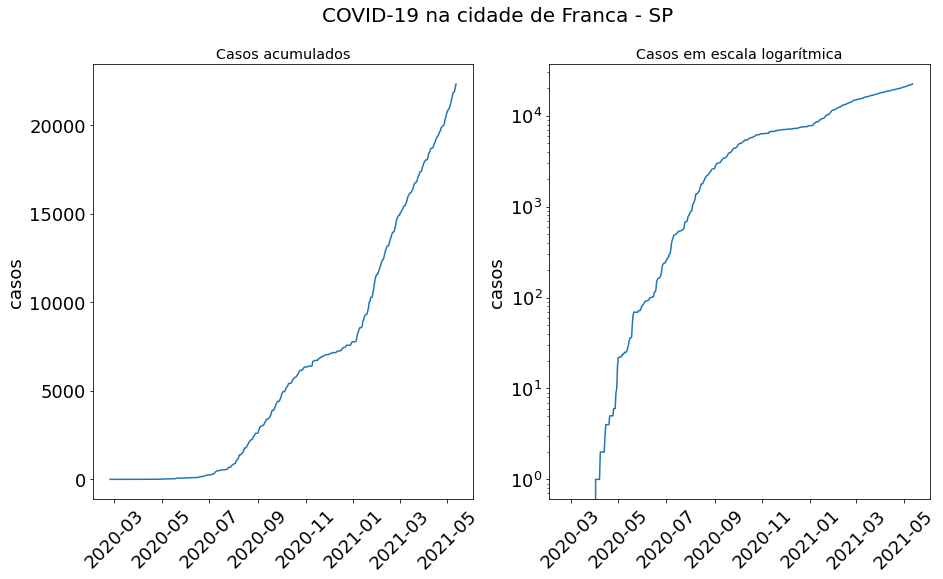

In [42]:
#observando os casos acumulados e sua forma logarítmica em Franca
fig, ax = plt.subplots(1,2, sharey=False, figsize=(15,8), sharex=True, facecolor=None)
plt.style.use('ggplot')

sns.lineplot(ax=ax[0], data=franca_covid, x='datahora', y='casos')
ax[0].set_xlabel(None)
ax[0].set_title('Casos acumulados')
ax[0].tick_params(axis='x', labelrotation=45)

sns.lineplot(ax=ax[1], data=franca_covid, x='datahora', y='casos')
ax[1].set_xlabel(None)
ax[1].set_title('Casos em escala logarítmica')
ax[1].tick_params(axis='x', labelrotation=45)
plt.yscale('log')

plt.suptitle('COVID-19 na cidade de Franca - SP', fontsize=20)
plt.show()

In [43]:
#Criando das taxas de crescimento
dados_franca.loc[:,'taxa_crescimento_casos'] = dados_franca['casos_novos'].diff()
dados_franca.loc[:,'taxa_crescimento_obitos'] = dados_franca['obitos_novos'].diff()

In [44]:
dados_franca.loc[:, 'year'] = pd.DatetimeIndex(dados_franca['datahora']).year

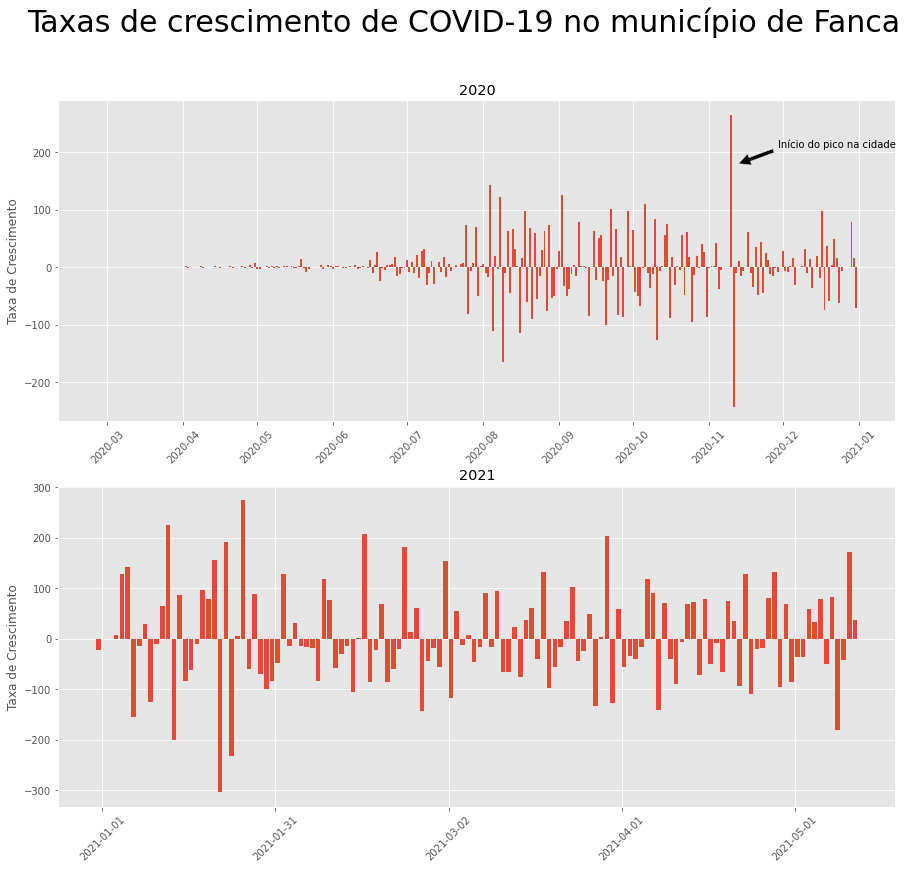

In [45]:
#observando as taxas de crescimento no município de Franca em 2020 e 2021
fig, ax = plt.subplots(2,1, figsize=(15,13))
ax[0].bar(data=dados_franca.query('year == 2020'), x='datahora', height='taxa_crescimento_casos')
ax[0].set_ylabel('Taxa de Crescimento')
ax[0].set_xlabel(None)
ax[0].set_title('2020')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].annotate('Início do pico na cidade', xy=(0.81, 0.8), xycoords='axes fraction', xytext=(1, 0.88), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='top')

ax[1].bar(data=dados_franca.query('year == 2021'), x='datahora', height='taxa_crescimento_casos')
ax[1].set_ylabel('Taxa de Crescimento')
ax[1].set_xlabel(None)
ax[1].set_title('2021')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=1))

plt.suptitle('Taxas de crescimento de COVID-19 no município de Fanca', fontsize=30)
plt.show()

A primeira peculiaridade que podemos perceber é que enquanto boa parte do mundo se debatia com uma pandemia descontrolada no primeiro semestre de 2020, Franca teve baixíssima taxa de crescimento dos casos e de casos acumulados. Já no segundo semestre quando a pandemia relaxa no resto do planeta ela começa a acelerar em Franca e dispara ainda mais depois de Novembro/2020. Podemos perceber isso em 2021 também quando o gráfico desse ano tem sua escala do eixo Y modificada para -300 a 300 contra -200 a 200 em 2020.

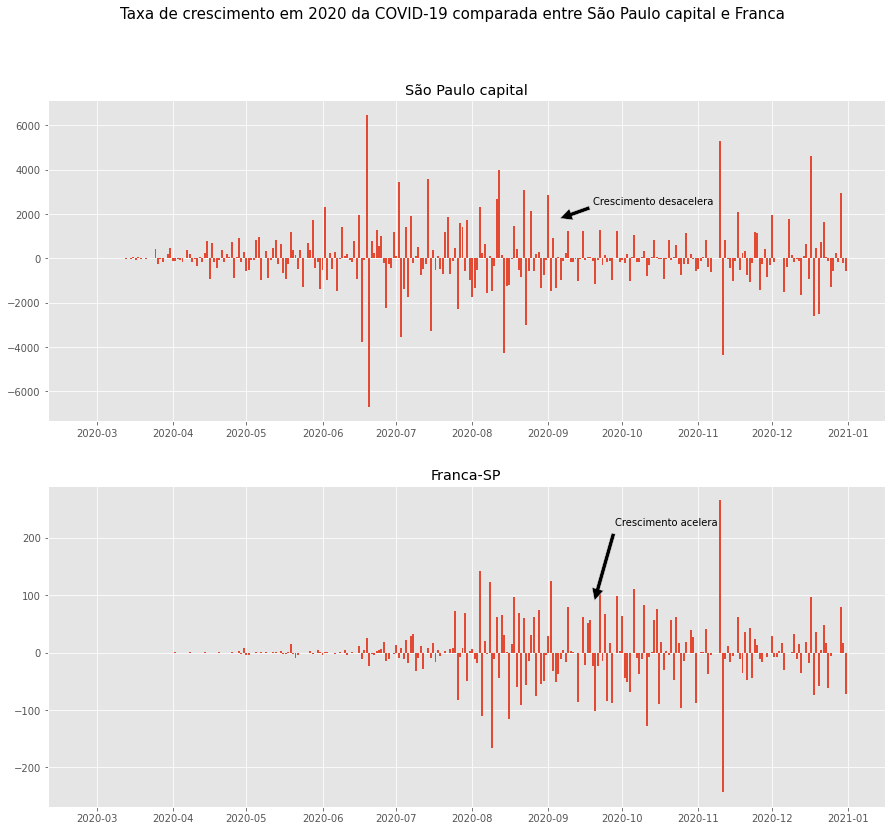

In [46]:
#comparando taxa de crescimento da COVID em São Paulo e em Franca durante 2020
fig, ax = plt.subplots(2,1, figsize=(15,13))

ax[0].bar(data=dados_capital_copy.query('year==2020'), x='datahora', height='taxa_crescimento_casos')
ax[0].set_title('São Paulo capital')
ax[0].annotate('Crescimento desacelera', xy=(0.61, 0.63), xycoords='axes fraction', xytext=(0.652,0.7), textcoords='axes fraction',
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='top')

ax[1].bar(data=dados_franca.query('year==2020'), x='datahora', height='taxa_crescimento_casos')
ax[1].set_title('Franca-SP')
ax[1].annotate('Crescimento acelera', xy=(0.652, 0.63), xycoords='axes fraction', xytext=(0.678,0.9), textcoords='axes fraction',
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='top')



plt.suptitle('Taxa de crescimento em 2020 da COVID-19 comparada entre São Paulo capital e Franca', fontsize=15)
plt.show()

Podemos ver portanto que enquanto as taxas até Junho/2020 estavam altas em São Paulo há pouco crescimento em Franca, a partir de Setembro a pandemia desacelera na capital e acelera em Franca.

O que me faz levantar um hipótese que discuto desde o começo da pandemia. Apesar dos esforços serem do mundo todo, a pandemia e suas consequências acabam sendo muito influenciadas pela realidade local de cada município.

###Observando a média móvel de casos e óbitos em Franca-SP

In [47]:
#criando as colunas de média móvel, 7 dias para casos e 14 dias para óbitos
dados_franca = dados_franca.copy()
dados_franca.loc[:, 'media_movel_7_casos'] = dados_franca['casos_novos'].rolling(7, center=False).mean()
dados_franca.loc[:, 'media_movel_14_obitos'] = dados_franca['obitos_novos'].rolling(14, center=False).mean()

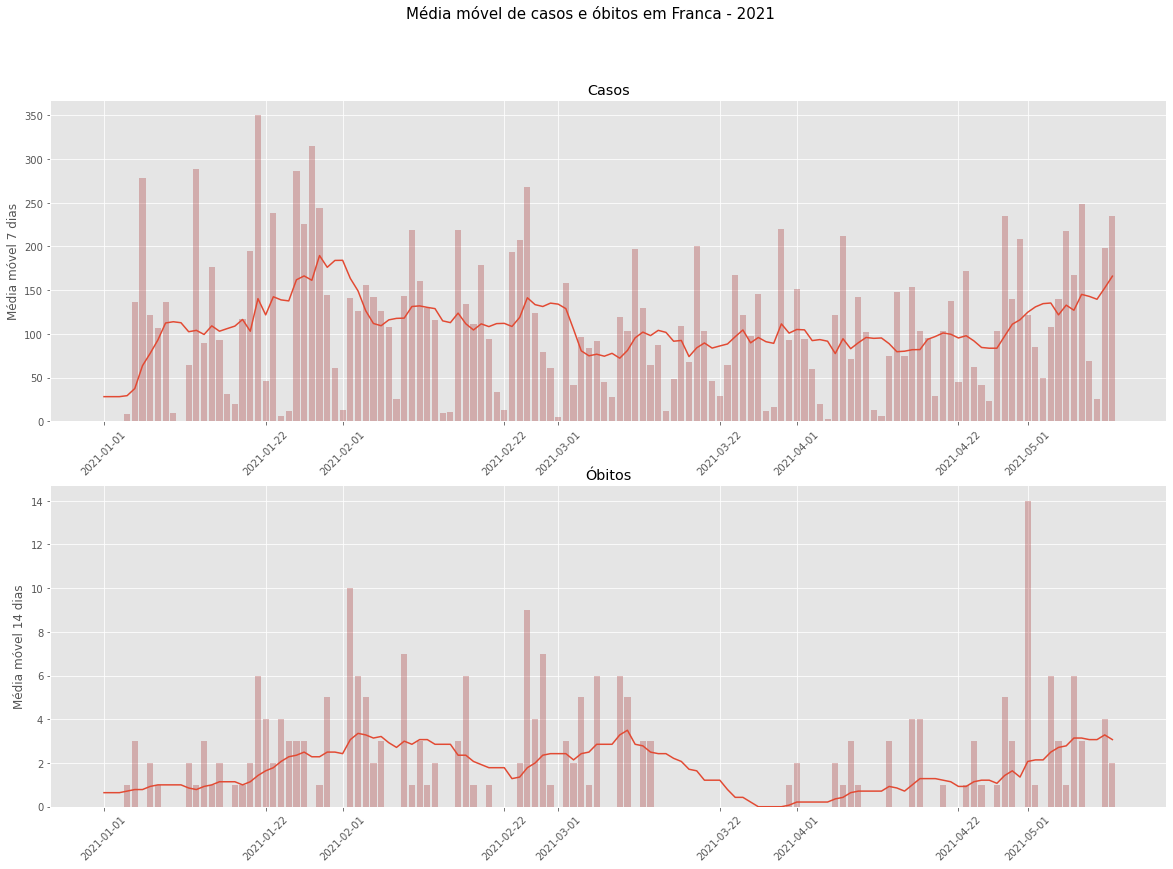

In [48]:
#observando a média móvel em 2021
fig, ax = plt.subplots(2,1, figsize=(20,13))

ax[0].bar(data=dados_franca.query('year==2021'), x='datahora', height='casos_novos', color='brown', alpha=0.3)
sns.lineplot(data=dados_franca.query('year==2021'), x='datahora', y='media_movel_7_casos', ax=ax[0])

ax[0].set_xlabel(None)
ax[0].set_ylabel('Média móvel 7 dias')
ax[0].set_title('Casos')
ax[0].tick_params(axis='x', labelrotation=45)

ax[1].bar(data=dados_franca.query('year==2021'), x='datahora', height='obitos_novos', color='brown', alpha=0.3)
sns.lineplot(data=dados_franca.query('year==2021'), x='datahora', y='media_movel_14_obitos', ax=ax[1])

ax[1].set_xlabel(None)
ax[1].set_ylabel('Média móvel 14 dias')
ax[1].set_title('Óbitos')
ax[1].tick_params(axis='x', labelrotation=45)

plt.suptitle('Média móvel de casos e óbitos em Franca - 2021', fontsize=15)
plt.show()

Temos um pico de casos em Janeiro que não é acompanhado pelos óbitos, a partir de Fevereiro a pandemia se mantém constantemente num padrão de descontrole entre 100 a 200 casos diários, porém a partir de Maio os óbitos disparam com o dia 01/05 tendo a mais infeliz marca de toda 2021 na cidade - 14 óbitos registrados e com a média móvel subindo.

Esse descontrole em Maio se comprovou verdade - esse notebook está sendo feito na semana do dia 14/06/2021, na metade de Maio após a média começar a subir, o sistema de saúde da cidade colapsou com mais de 40 pessoas na fila de esperar por uma UTI, o que gerou o mais ferrenho lockdown desde o começo da pandemia na cidade, que se encerrou dia 11/06/2021, daqui algumas semanas quando tais dados estiverem disponíveis poderá-se comprovar se o lockdown funcionou.

Dados preliminares indicam que não - uma notícia no dia 10/06 indicou que mesmo com o lockdown a movimentação na cidade foi de 60%, os especialistas recomendam 40% para controlar a pandemia.

###Observando a sazonalidade dos casos em Franca

Nos dois gráficos acima já pudemos perceber que há como em São Paulo uma sazonalidade na semana, ou seja, aos fins de semana a taxa de notificação cai bruscamente. Vamos observar a autocorrelação dos casos ao longo do tempo e a correlação entre casos e óbitos.

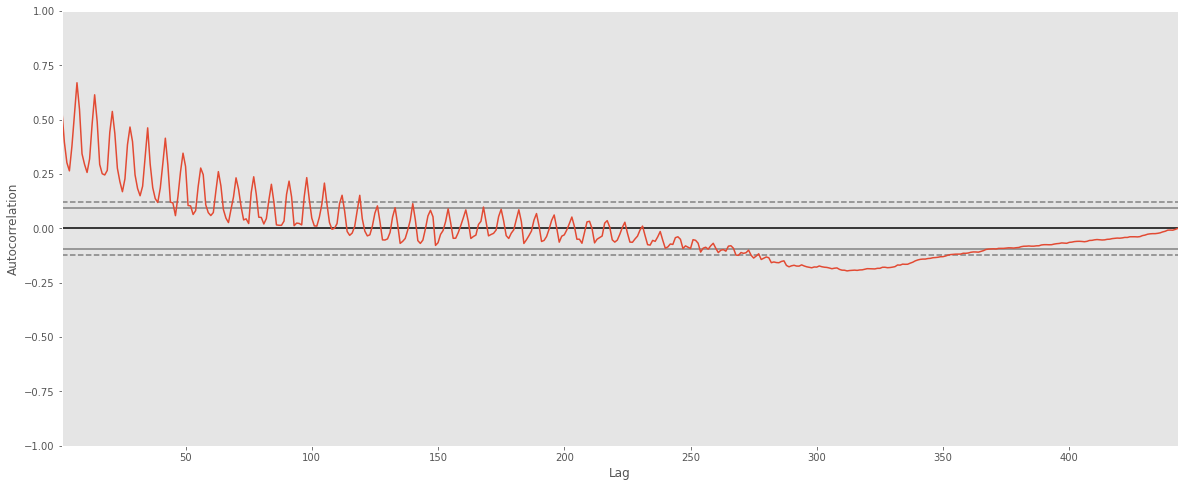

In [49]:
autocorrelation_plot(dados_franca['casos_novos'])

Diferente de São Paulo capital, em Franca a pandemia não chegou a ficar negativa por volta dos 100 de lag e fica negativa e não próxima de zero a partir de 280 lag.

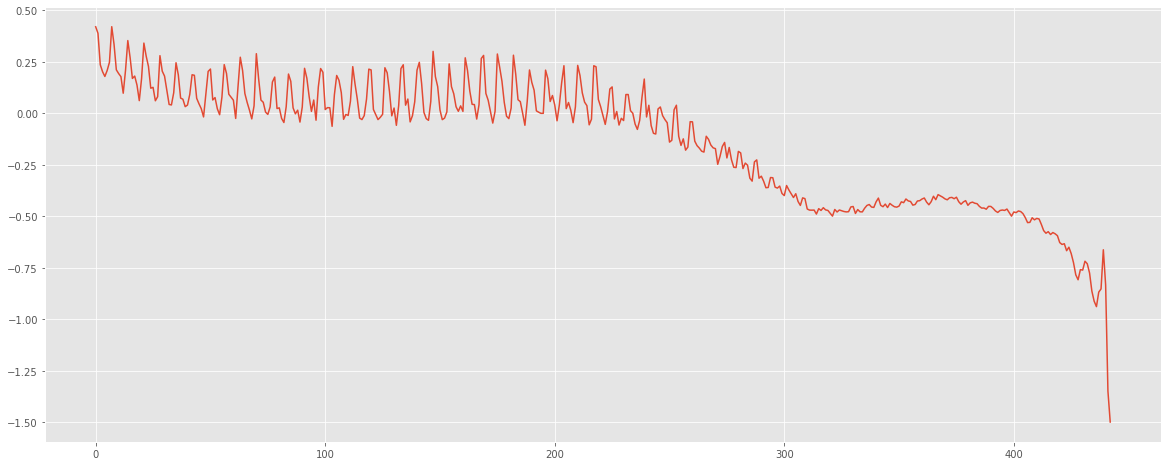

In [50]:
#correlação casos e óbitos
plt.plot(ccf(dados_franca['casos_novos'], dados_franca['obitos_novos']))

###Conclusões: A resposta à pandemia parece realmente ser mais local do nacional, havendo diferenças entre quando ocorreram picos entre as cidades, assim como na distribuição dos casos e dos óbitos, a partir de 2021 Franca começa novo pico de casos e que mesmo tendo um relativo controle o número de mortes fica descorrelacionado. 

###Hoje já bastante conhecida isso dá pela variante P.1 que surgiu em Manaus e rapidamente se tornou a variante principal a circular no estado de São Paulo, ela é mais transmissível e faz com que os que necessitam de atendimento médico permaneçam mais tempo internados e demorem mais para se recuperar.

#Previsões de Series Temporais com Facebook Prophet

---
A partir da aula 02 do módulo 3 do Bootcamp de Data Science Aplicada da Alura vamos começar a aplicar o Facebook Prophet para fazer previsões com series temporais e entender suas peculiaridades.


In [51]:
from fbprophet import Prophet

In [52]:
#Montando o DataFrame no padrão do Prophet 
#inserimos um eixo x com as datas
#e um eixo y com a variável dependente
#como o Propeht é um modelo de Machine Learning já iremos seguir o padrão-ouro para os modelos - separar entre Treino e Teste (70 e 30%)
#O DataFrame tem 443 dias - 70%=310
#Porém como no vídeo os tutores fizeram com 400 dias o dataset de treino irei nesse momento replicá-los para conseguir saber se realizei correto
df_sp_train = pd.DataFrame()
df_sp_train['ds'] = dados_capital_copy['datahora'][:400]
df_sp_train['y'] = dados_capital_copy['casos_novos'][:400]

In [53]:
#instânciar o Objeto
model_train = Prophet()

In [54]:
#Nessa etapa fittamos o modelo aos nossos dados
model_train.fit(df_sp_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
#Aqui ele cria um DataFrame futuro
#O método make_future_dataframe recebe o parâmetro 'periods' que é o quanto queremos que ele preveja para frente
#Nesse primeiro caso, vamos para 30 dias apenas
df_sp_future = model_train.make_future_dataframe(periods=30)

In [56]:
#Agora realizamos as projeções nesse DataFrame
df_prediction_sp = model_train.predict(df_sp_future)

Ele cria uma coluna para cada previsão que faz, como a tendência, o quanto ela varia para cima e para baixo e no fim combina todas elas que resulta na coluna yhat (que em matemática significa variável de previsão).

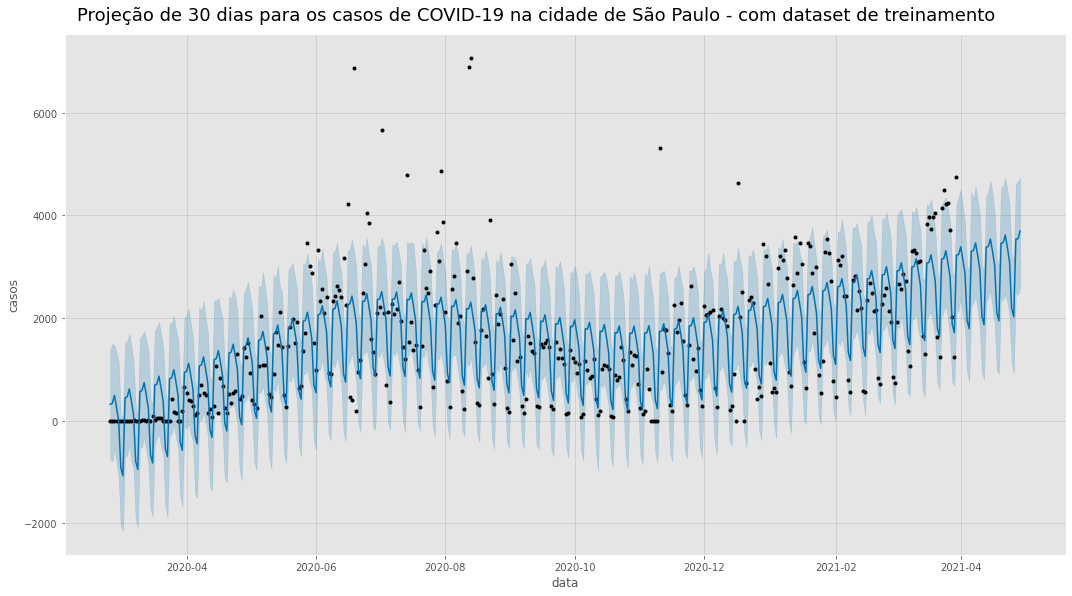

In [57]:
#Agora vamos plotar graficamente nossa previsão
model_train.plot(df_prediction_sp, xlabel='data', ylabel='casos', figsize=(15,8)); #colocar esse ';' para ele não criar uma copia da imagem
plt.suptitle('Projeção de 30 dias para os casos de COVID-19 na cidade de São Paulo - com dataset de treinamento', y=1.03, fontsize=18)
plt.show()

In [58]:
#Agora vamos plotar em cima desse gráfico a parte de teste do nosso dataframe
df_sp_test = pd.DataFrame()
df_sp_test['ds'] = dados_capital_copy['datahora'][400:]
df_sp_test['y'] = dados_capital_copy['casos_novos'][400:]

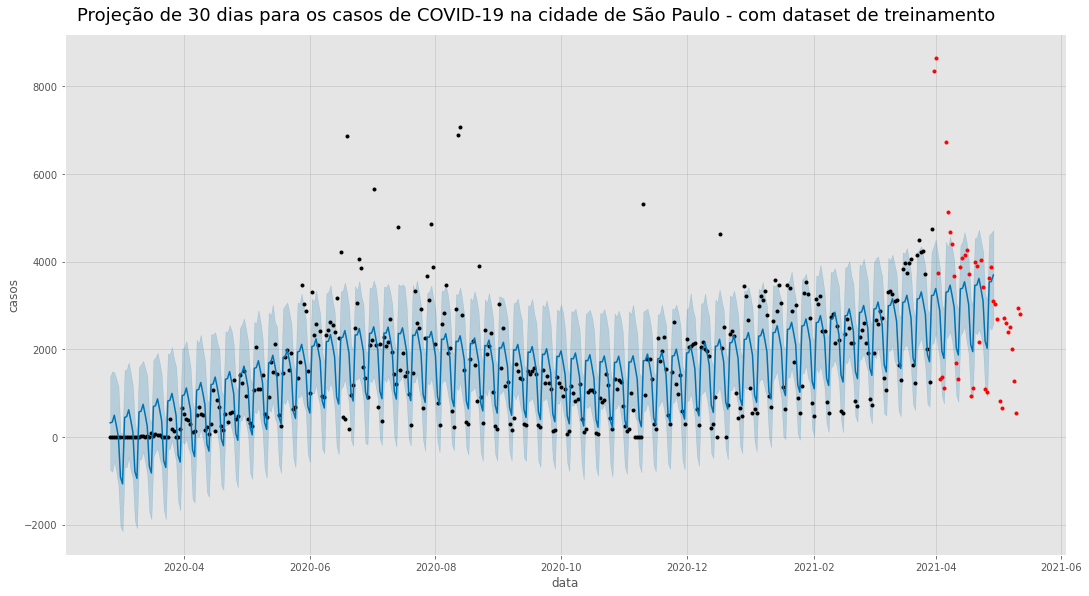

In [59]:
model_train.plot(df_prediction_sp, xlabel='data', ylabel='casos', figsize=(15,8)); #colocar esse ';' para ele não criar uma copia da imagem
plt.plot(df_sp_test['ds'], df_sp_test['y'], '.r')
plt.suptitle('Projeção de 30 dias para os casos de COVID-19 na cidade de São Paulo - com dataset de treinamento', y=1.03, fontsize=18)
plt.show()

Como esse é apenas o embrião do modelo e utilizando apenas as capacidades iniciais do Prophet, o modelo está ruim, quase todos os valores do teste estão fora da previsão (linha azul mais forte) apesar de estarem no confidence interval.

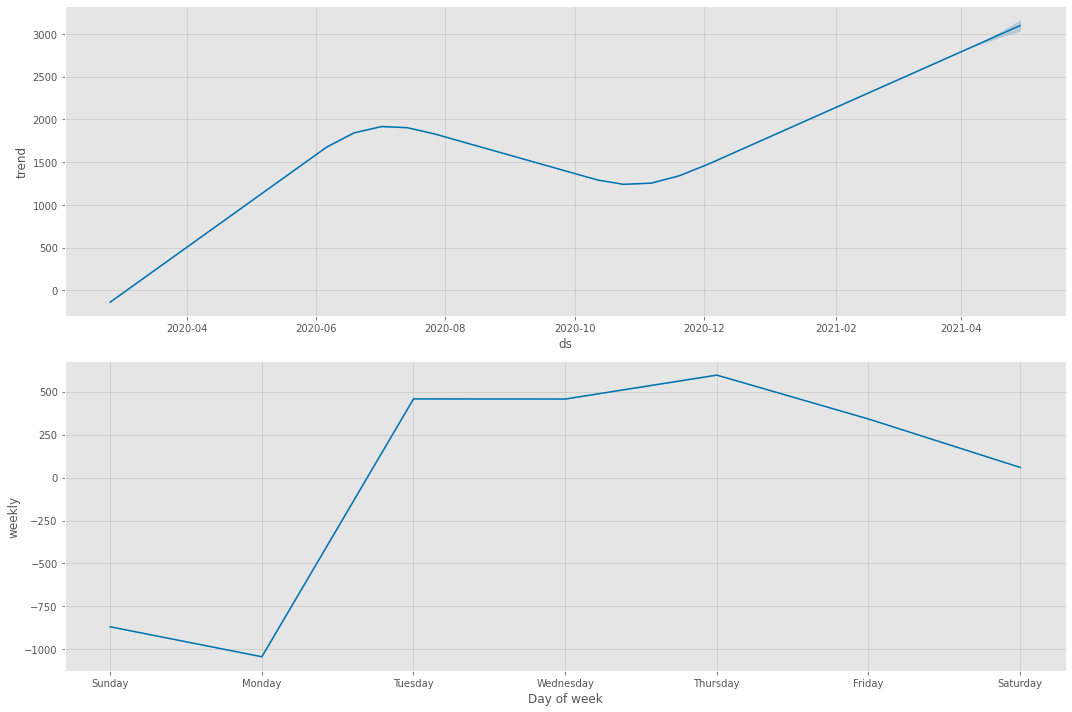

In [60]:
#podemos detalhar as previsões feitas pelo Prophet com o método .plot_components
model_train.plot_components(df_prediction_sp, figsize=(15,10));

##Desafio 08: Fazer mais duas previsões - agora para 60 e 120 dias

In [61]:
df_sp_future_60 = model_train.make_future_dataframe(periods=60)

In [62]:
df_prediction_sp_60 = model_train.predict(df_sp_future_60)

Text(0.5, 1.03, 'Previsão de casos para 60 dias')

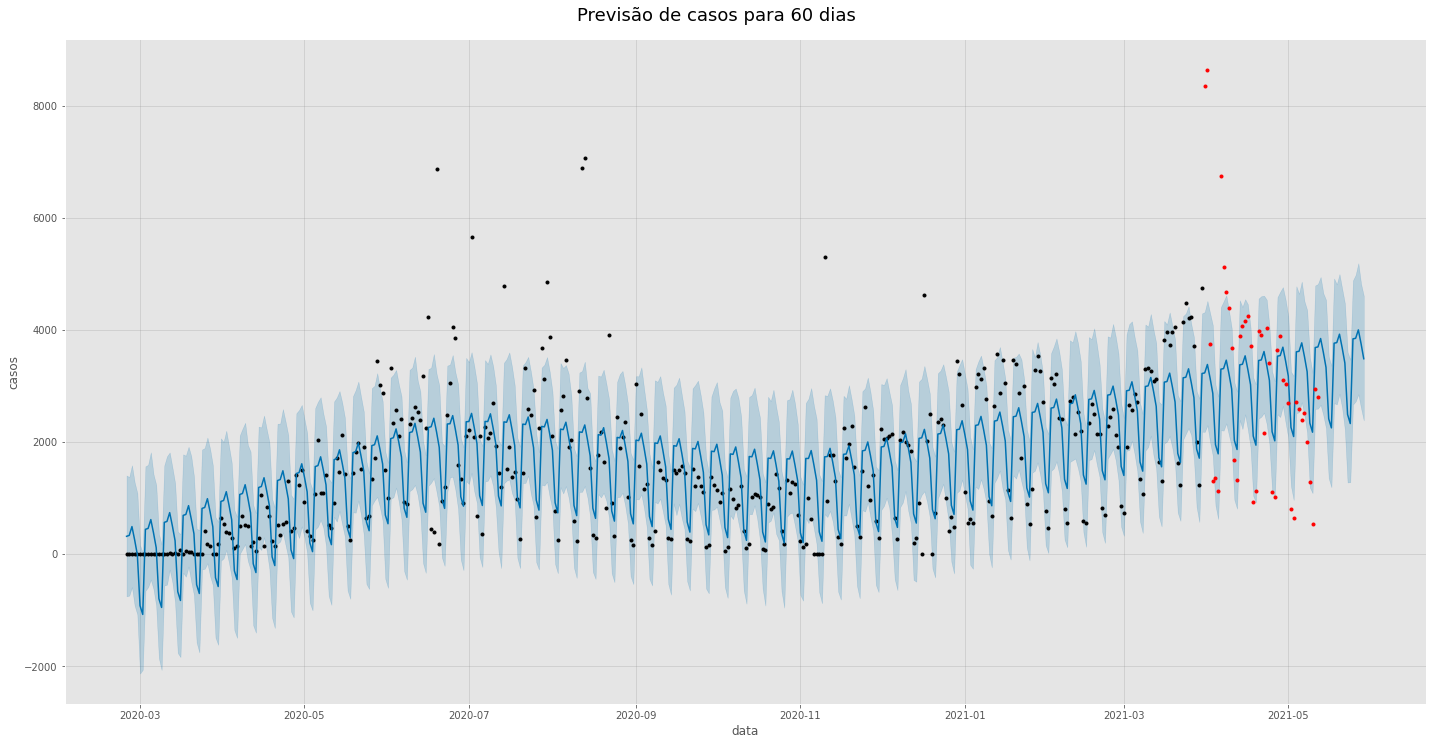

In [63]:
model_train.plot(df_prediction_sp_60, xlabel='data', ylabel='casos', figsize=(20,10))
plt.plot(df_sp_test['ds'], df_sp_test['y'], '.r')
plt.suptitle('Previsão de casos para 60 dias', fontsize=18, y=1.03)

Previsão para 365 dias

In [64]:
df_sp_future_365 = model_train.make_future_dataframe(periods=365)

In [65]:
df_prediction_sp_365 = model_train.predict(df_sp_future_365)

Text(0.5, 0.98, 'Previsão de casos de COVID-19 para 365 dias em São Paulo-SP')

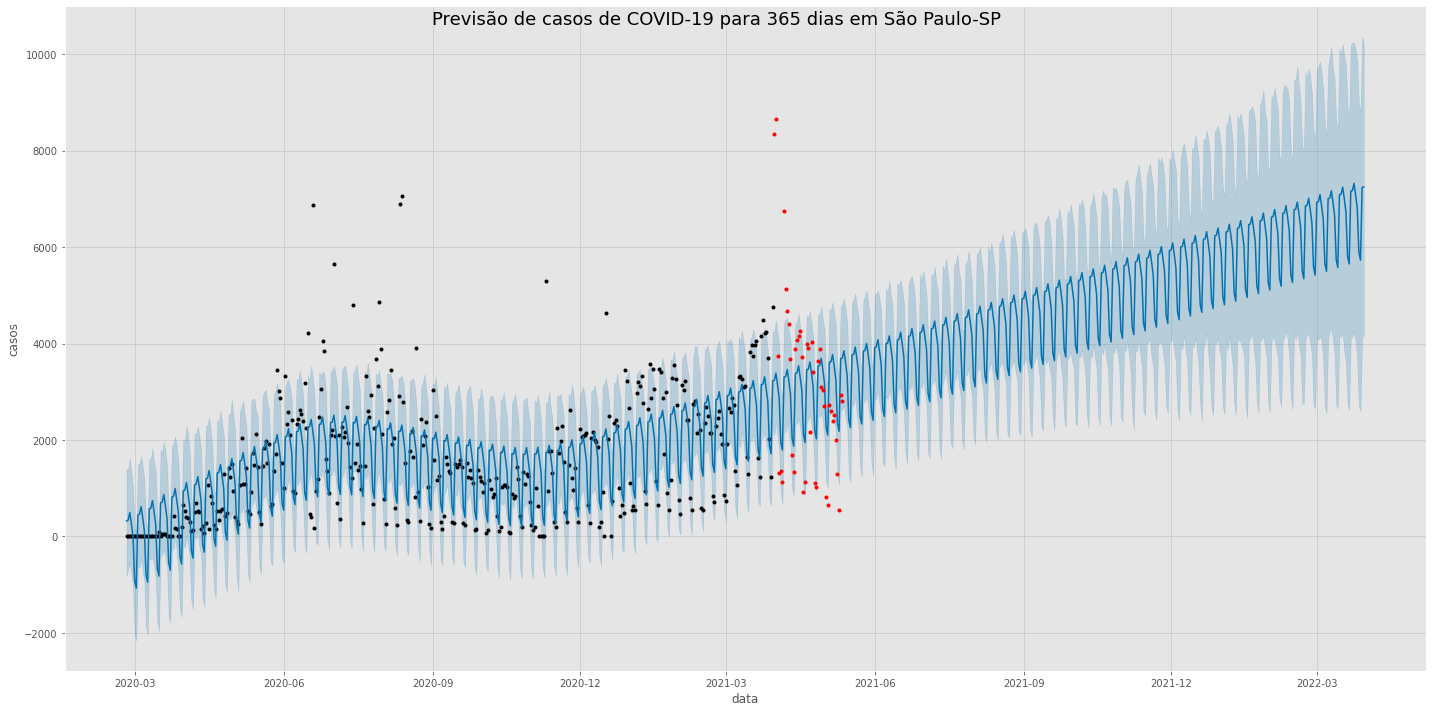

In [66]:
model_train.plot(df_prediction_sp_365, xlabel='data', ylabel='casos', figsize=(20,10))
plt.plot(df_sp_test['ds'], df_sp_test['y'], '.r')

plt.suptitle('Previsão de casos de COVID-19 para 365 dias em São Paulo-SP', fontsize=18)

Para quem olhar para esse gráfico e se assustar, vale lembrar algumas coisas:

- O modelo está muito básico e ruim, estamos apenas com os parâmetros padrões e sem utilizar todo o poder do Prophet;
- O Prophet, apesar do nome (piadoca haha) não é um profeta ou vidente, ele apenas olha para o padrão passado e aplica a previsão a partir dele, e também só compreende os dados que lhe damos, ou seja, ele não compreende por exemplo que boa parte (senão toda) a população já estará vacinada em Abril de 2022 o que irá por consequência reduzir os casos na cidade. 

##Desafio 10: Refazer todo o processo de previsão para os casos acumulados

In [67]:
#instanciando o Prophet
model2 = Prophet()

In [68]:
df_acumulado_sp = pd.DataFrame()
df_acumulado_sp['ds'] = dados_capital_copy['datahora'][:400]
df_acumulado_sp['y'] = dados_capital_copy['casos'][:400]

In [69]:
df_acumulado_sp_test = pd.DataFrame()
df_acumulado_sp_test['ds'] = dados_capital_copy['datahora'][400:]
df_acumulado_sp_test['y'] = dados_capital_copy['casos'][400:]

In [70]:
model2.fit(df_acumulado_sp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
df_acumulado_sp_future = model2.make_future_dataframe(periods=30)

In [72]:
df_predict_2 = model2.predict(df_acumulado_sp_future)

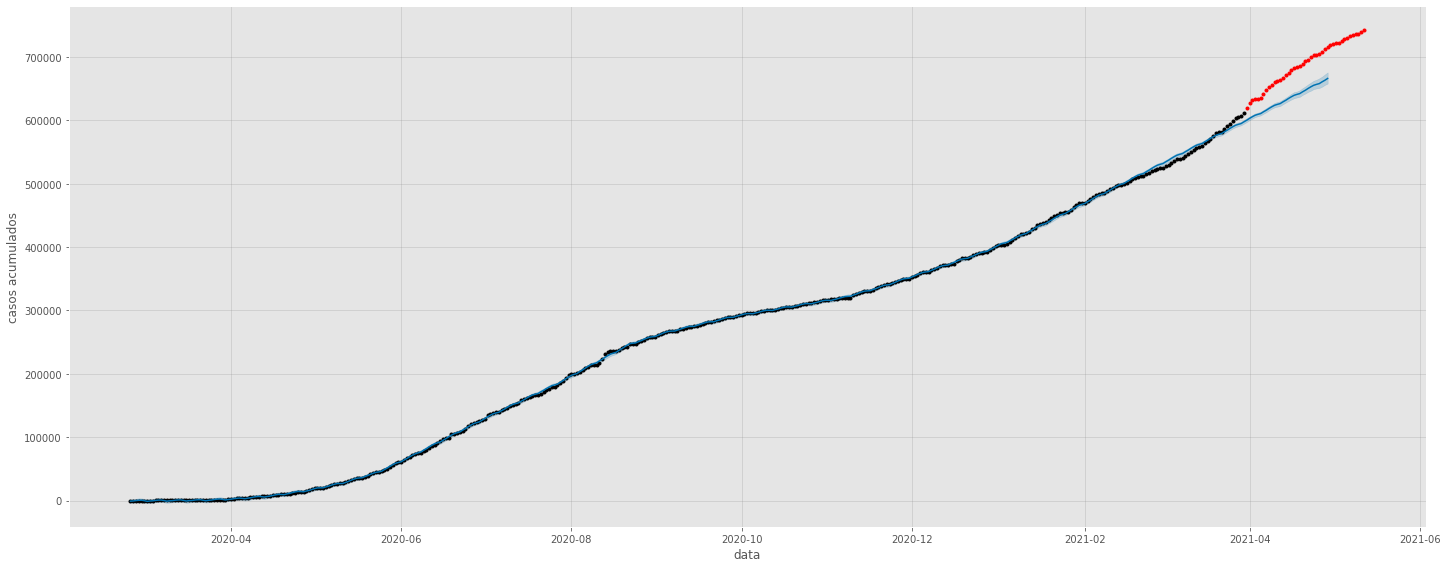

In [73]:
model2.plot(df_predict_2, xlabel='data', ylabel='casos acumulados', figsize=(20,8));
plt.plot(df_acumulado_sp_test['ds'], df_acumulado_sp_test['y'], '.r')

Novamente por estar muito básico nossa previsão está ruim.

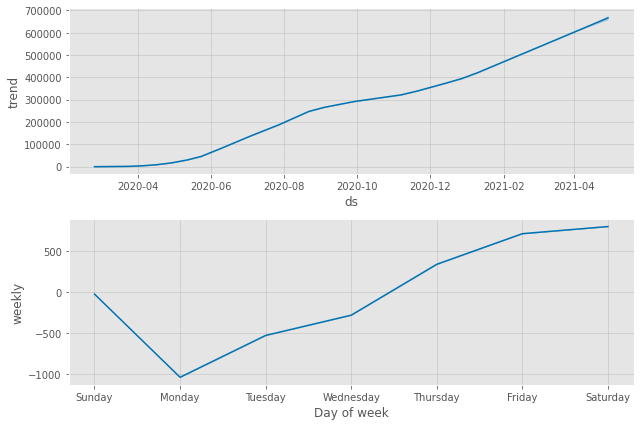

In [74]:
model2.plot_components(df_predict_2);

In [75]:
#Aplicando o argumento logaritmíco no lugar do linear para os casos acumulados
model2 = Prophet(growth='logistic')

In [76]:
df_acumulado_sp = pd.DataFrame()
df_acumulado_sp['ds'] = dados_capital_copy['datahora'][:400]
df_acumulado_sp['y'] = dados_capital_copy['casos'][:400]
df_acumulado_sp['cap'] = 10

In [77]:
model2.fit(df_acumulado_sp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
df_acumulado_sp_future2 = model2.make_future_dataframe(periods=30)
df_acumulado_sp_future2['cap'] = 10

In [79]:
df_predict_3 = model2.predict(df_acumulado_sp_future2)


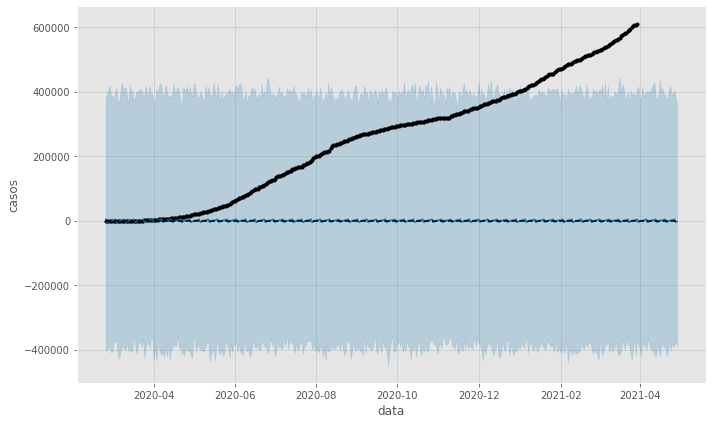

In [80]:
model2.plot(df_predict_3, xlabel='data', ylabel='casos');

##Aula 03: Changepoints e mudança de tendência 

In [81]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=5)

###Desafio 11: Fazer uma função para rodar o modelo de forma automatizada

In [82]:
def rodar_model(nome_modelo, dataframe: pd.DataFrame, nome_model_previsto: pd.DataFrame, periodo_dias: int, nome_eixo_x: str, nome_eixo_y: str):
  """Função que modela o Facebook Prophet de maneira rápida e eficiente, inclui plotagem de changepoints. Não esqueça de instanciar um objeto Prophet
  e suas respectivas variáveis antes de rodar essa função.
  """
  from fbprophet.plot import add_changepoints_to_plot
  nome_modelo.fit(dataframe)
  dataframe_futuro = nome_modelo.make_future_dataframe(periods=periodo_dias)
  nome_model_previsto = nome_modelo.predict(dataframe_futuro)
  fig = nome_modelo.plot(nome_model_previsto, xlabel=nome_eixo_x, ylabel=nome_eixo_y, figsize=(15,8));
  changes = add_changepoints_to_plot(fig.gca(), nome_modelo, nome_model_previsto)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


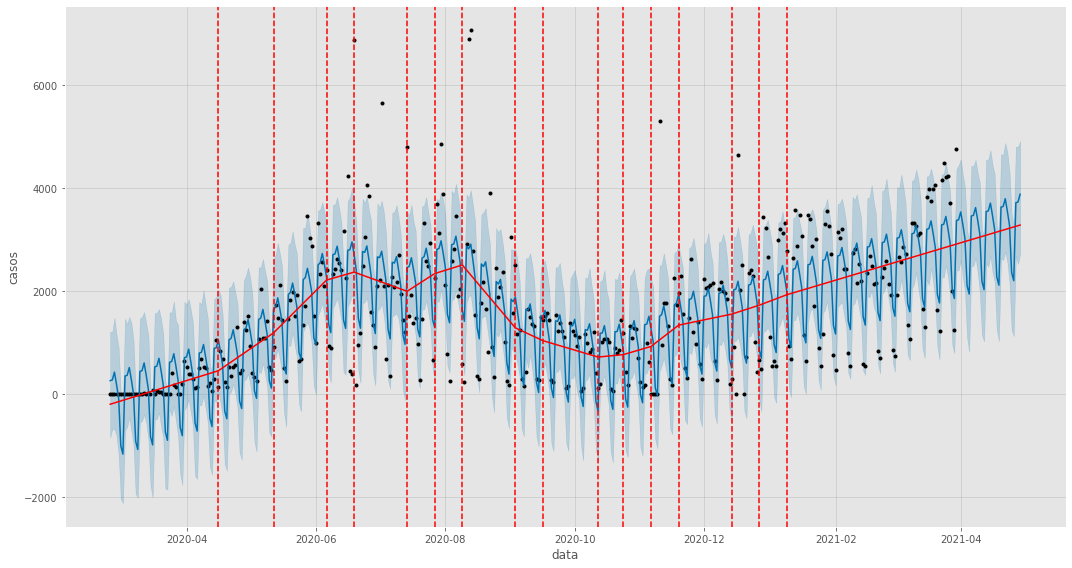

In [84]:
rodar_model(modelo, df_sp_train, 'df_predict_4', 30, 'data', 'casos')

In [ ]:
modelo.fit(df_sp_train)

In [86]:
df_sp_future2 = modelo.make_future_dataframe(periods=30)

In [87]:
df_predict_4 = modelo.predict(df_sp_future2)

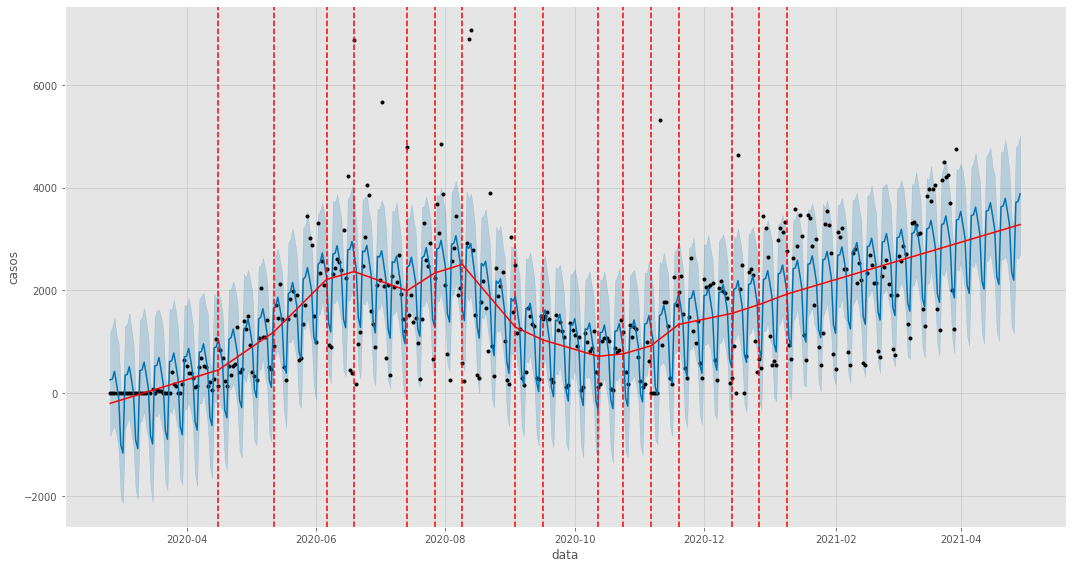

In [88]:
from fbprophet.plot import add_changepoints_to_plot
fig = modelo.plot(df_predict_4, xlabel='data', ylabel='casos', figsize=(15,8));
changes = add_changepoints_to_plot(fig.gca(), modelo, df_predict_4)

##Aula 04: Feriados e Sazonalidade

Nessa aula vamos estudar como adicionar feriados para melhorar a interpretação dos nossos dados e como definir qual o melhor tipo de sazonlidade dos nossos dados.

In [89]:
#Vamos começar instanciando o objeto
modelo_feriado = Prophet(changepoint_prior_scale=10.0)

In [90]:
#Agora para adicionarmos os feriados temos dois métodos:
# 1- Definir o parâmetro país na função add_country_holidays
# 2- Definir os feriados como DataFrames e passar o parâmetro holidays no Prophet

In [91]:
#usando o add_country_holidays
modelo_feriado.add_country_holidays('BR')

In [92]:
modelo_feriado.fit(df_sp_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
feriado_futuro = modelo_feriado.make_future_dataframe(periods=43)

In [94]:
previsao_feriado = modelo_feriado.predict(feriado_futuro)

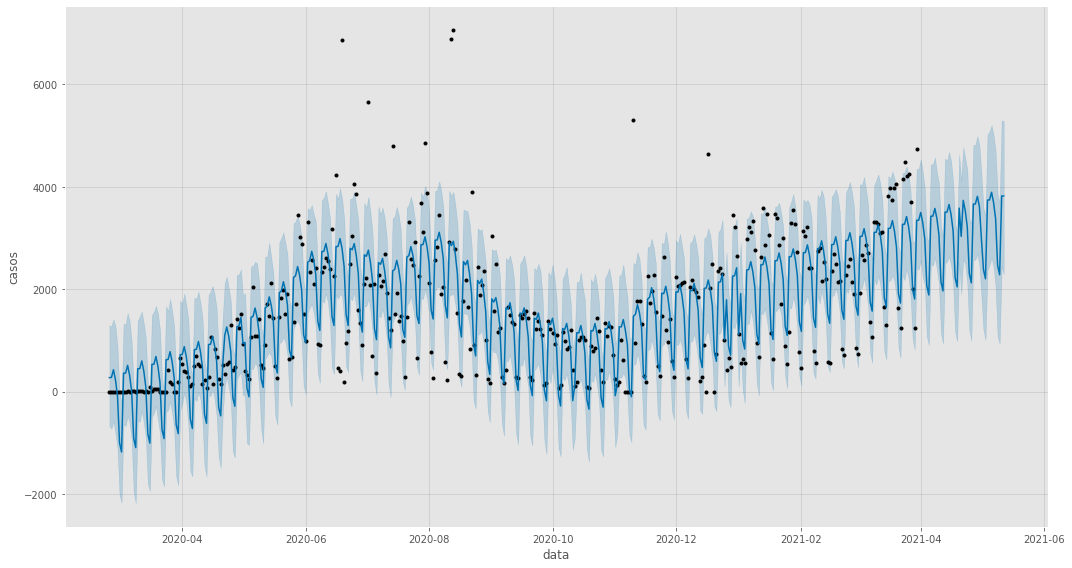

In [95]:
fig = modelo_feriado.plot(previsao_feriado, xlabel='data', ylabel='casos', figsize=(15,8)) 

Agora podemos notar que nossos dados parecem ter alguns pontos diferenciados - que são a inclusão dos feriados, o problema é que, como estamos com um parâmetro de país, apenas os feriados nacionais estão refletidos e temos ainda o problema da iniciativa inédita da prefeitura e do estado paulista de adiantar feriados numa tentativa de conter o vírus. 

Por isso vamos passar os df's de feriado para o Prophet e observar se ele melhor se ajusta portanto.

In [96]:
#passando os feriados 
feriado_sp_2020 = [
                   '2020-02-25',
                   '2020-02-26',
                   '2020-04-10',
                   '2020-04-21',
                   '2020-05-01',
                   '2020-05-20',
                   '2020-05-21',
                   '2020-05-22',
                   '2020-05-25',
                   '2020-06-11',
                   '2020-09-07',
                   '2020-10-12',
                   '2020-11-02',
                   '2020-11-15',
                   '2020-12-25'
                   ]

feriado_sp_2021 = [
                   '2021-01-01',
                   '2021-01-25',
                   '2021-02-15',
                   '2021-02-16',
                   '2021-02-17',
                   '2021-03-26',
                   '2021-03-29',
                   '2021-03-30',
                   '2021-03-31',
                   '2021-04-01',
                   '2021-04-02',
                   '2021-04-22',
                   '2021-05-01'

]

In [97]:
#passando para dfs
feriado_sp_2020 = pd.DataFrame({'holiday':'sp_2020', 'ds':pd.to_datetime(feriado_sp_2020)})

In [98]:
feriado_sp_2021 = pd.DataFrame({'holiday':'sp_2021', 'ds':pd.to_datetime(feriado_sp_2021)})

In [99]:
#concatenando os dfs
feriados_sp = pd.concat([feriado_sp_2020, feriado_sp_2021])

In [100]:
#adicionando os holidays ao nosso objeto Prophet
modelo_feriado = Prophet(changepoint_prior_scale=10.0, holidays=feriados_sp, seasonality_mode='multiplicative')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


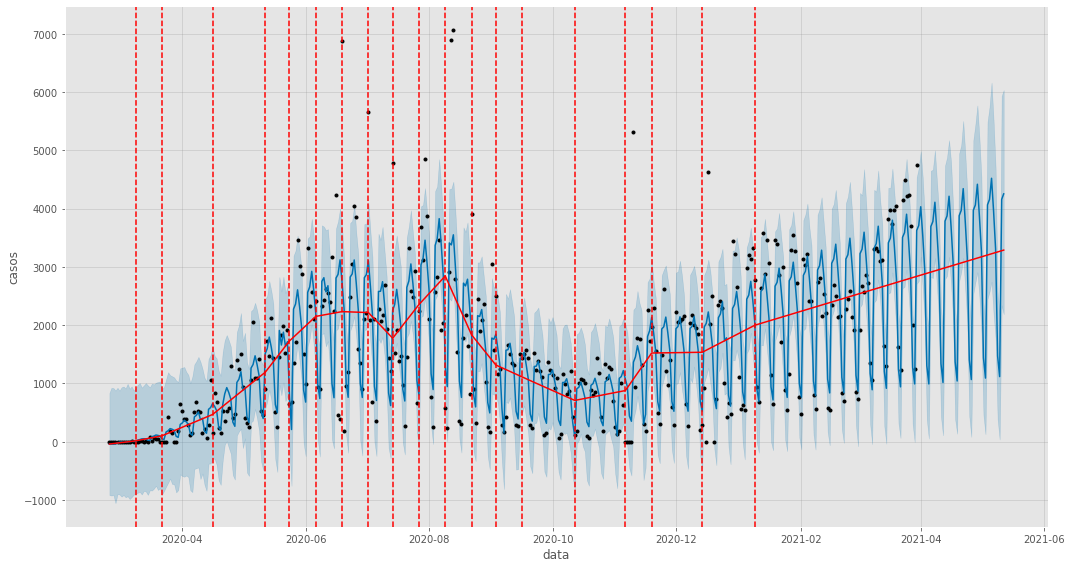

In [101]:
rodar_model(modelo_feriado, df_sp_train, previsao_feriado, 43, 'data', 'casos')

Aparentemente nosso modelo voltou a 'desenho normal' mas agora os pontos pretos parecem um pouco melhor fitados.

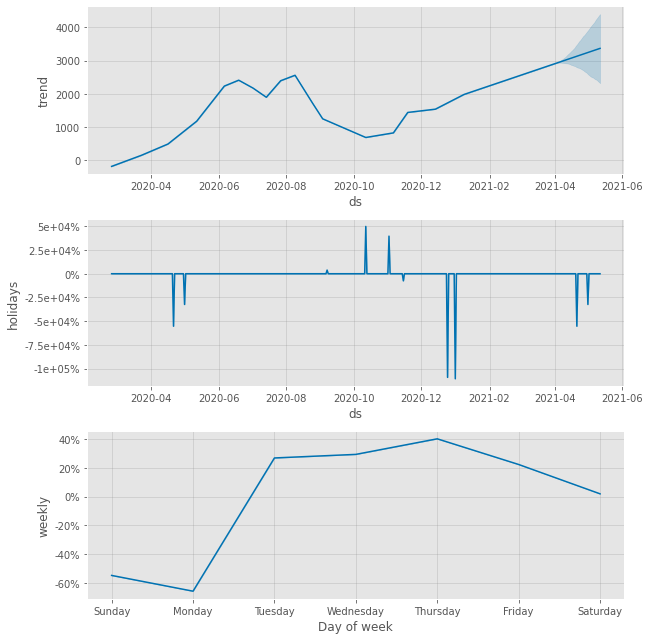

In [102]:
#observando os feriados no plot_components
modelo_feriado.plot_components(previsao_feriado);

###Entendendo a sazonalidade e sua forma no dataset

Para podermos comparar como está nossa sazonalidade no gráfico precisamos definir uma métrica para isso. Utilizaremos a biblioteca Sklearn que já conta com várias dessas

In [103]:
from sklearn import metrics

In [104]:
#Utilizando a mean_error para medir a diferença entre nossos dados reais e previsões com uma sazonalidade aditiva
metrics.mean_absolute_error(df_sp_train['y'], previsao_feriado['yhat'][:400])

530.2501992272145

In [105]:
#Utilizando a mean_error para medir a diferença entre nossos dados reais e previsões com uma sazonalidade multiplicativa
metrics.mean_absolute_error(df_sp_train['y'], previsao_feriado['yhat'][:400])

530.2501992272145

###Desafio 12: Plotar uma linha ao invés de pontos no Prophet

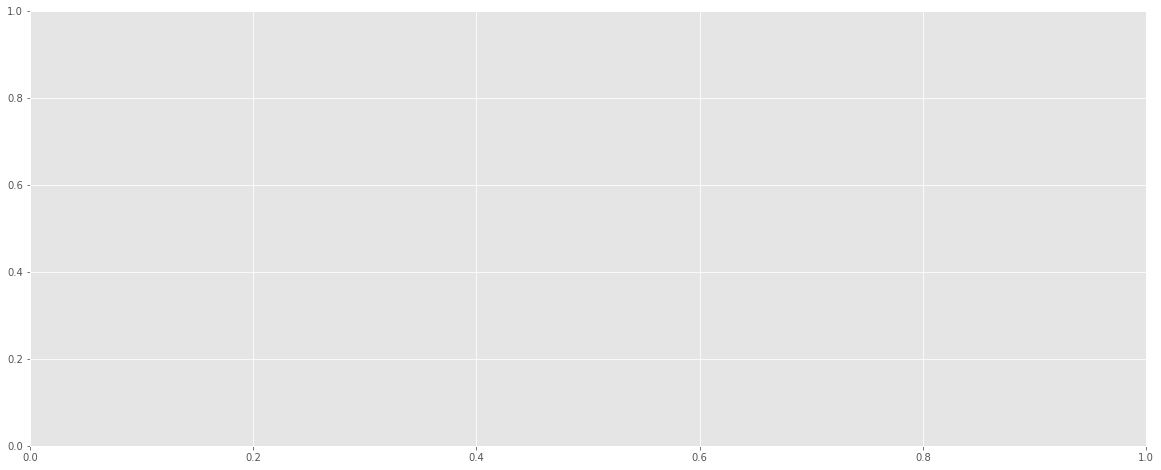

In [106]:
fig = plt.figure(facecolor='w')

ax = fig.add_subplot(111)

In [107]:
fcst_t = fcst['ds'].dt.to_pydatetime()
ax.plot(model.history['ds'].dt.to_pydatetime(), model.history['y'], 'k.')

NameError: ignored

#Aula 05: Outliers e validação

In [108]:
#Uma das muitas formas de melhorar nosso modelo e já se encaminhando para o final dos ajustes é tratar os outliers que distorcem os dados
#é isso que vamos fazer agora

In [109]:
previsao_feriado.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -189.748614  ...                         0.0  272.647539
1 2020-02-26 -177.419072  ...                         0.0  275.642120
2 2020-02-27 -165.089530  ...                         0.0  426.473526
3 2020-02-28 -152.759988  ...                         0.0  226.888015
4 2020-02-29 -140.430445  ...                         0.0  -87.823604

[5 rows x 43 columns]

In [110]:
novo_y = df_sp_train.reset_index()

In [111]:
novo_y = novo_y[(novo_y['y'] > previsao_feriado['yhat_lower'][:400]) & (novo_y['y'] < previsao_feriado['yhat_upper'][:400])]

In [112]:
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
392  253402 2021-03-23  4149
394  254692 2021-03-25  4214
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242

[352 rows x 3 columns]

In [113]:
df_sp_sem_outliers = novo_y.loc[:,['ds','y']]

In [120]:
modelo_feriado = Prophet(changepoint_prior_scale=10.0, holidays=feriados_sp, seasonality_mode='multiplicative')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


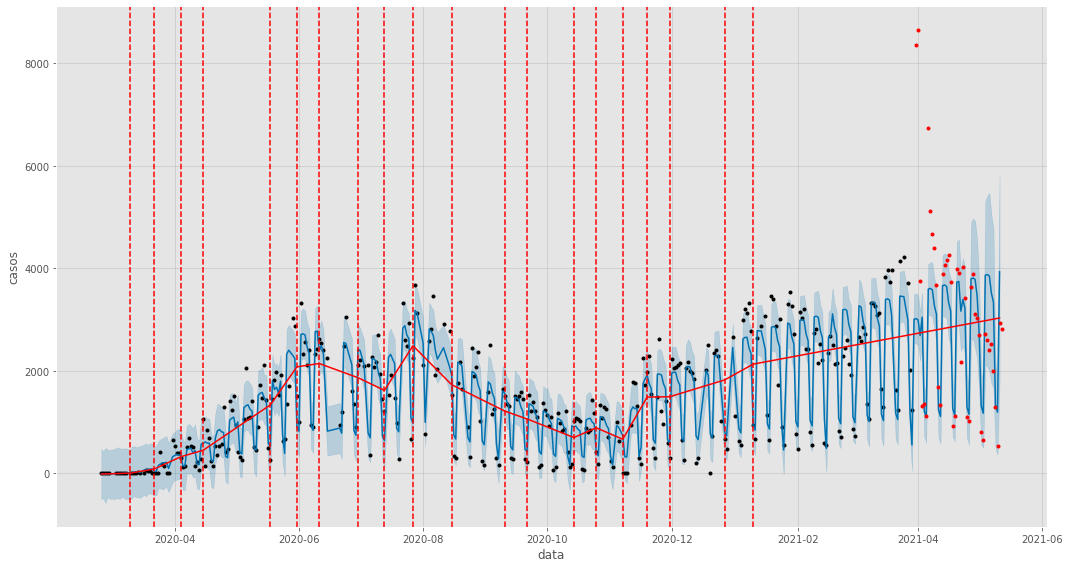

In [121]:
rodar_model(modelo_feriado, df_sp_sem_outliers, "previsao_feriado_outliers", 43, 'data', 'casos')
plt.plot(df_sp_test['ds'],df_sp_test['y'], 'r.')

##Aula 5.1: Cross-validation e métricas de avaliação do modelo

Nessa aula vamos aplicar a Cross-validation um método muito importante para os modelos de Machine Learning que avalia nosso modelo a partir de vários testes e resulta sua performance, também olharemos para as principais métricas de avaliação e entender qual a mais adequada para nosso caso.

In [128]:
#importando os módulos
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [125]:
#primeiro devemos fazer um novo dataframe com nossos dados que conterá as separações de treino e teste do cross_validation
df_cv = cross_validation(modelo_feriado, initial='200 days', period='30 days', horizon='30 days')
janela = 1

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-09-30 00:00:00 and 2021-02-27 00:00:00


In [129]:
#Observando nosso df_cv
df_cv.head()

ds         yhat  yhat_lower   yhat_upper     y     cutoff
0 2020-10-01  1218.427408  804.474131  1648.489899  1143 2020-09-30
1 2020-10-02  1112.577033  694.525765  1567.308702   925 2020-09-30
2 2020-10-03   953.072991  539.443240  1404.334511  1099 2020-09-30
3 2020-10-04   425.116742   10.372062   859.885763    67 2020-09-30
4 2020-10-05   411.445044  -37.051133   889.033126   124 2020-09-30

In [132]:
#vamos observar apenas uma janela do nosso cross_validation
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cutoff1 = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

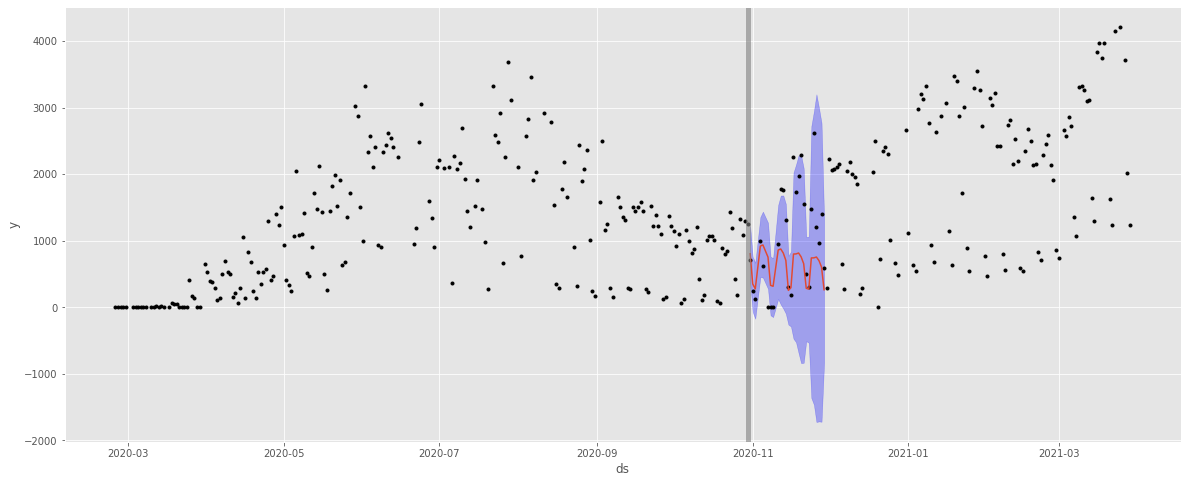

In [137]:
fig, ax = plt.subplots()
ax.plot(modelo_feriado.history['ds'].values, modelo_feriado.history['y'], 'k.')
ax.plot(df_cv_cutoff1['ds'].values, df_cv_cutoff1['yhat'])
ax.fill_between(df_cv_cutoff1['ds'].values, df_cv_cutoff1['yhat_lower'], df_cv_cutoff1['yhat_upper'], color='blue', alpha=0.3)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=5, alpha=0.6)
ax.set_ylabel('y')
ax.set_xlabel('ds')

No gráfico acima podemos ver a primeira janela da nossa validação e como a linha fica bem dentro do intervalo de confiança assim como os pontos.

Legenda: pontos pretos são os valores do modelo, linha cinza é a quebra que começa a primeira janela de 30 dias da validação, o espectro azul é o intervalo de confiança e a linha vermelha a previsão em si.

In [138]:
#observando as métricas de performance do modelo
df_performance = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [139]:
df_performance

horizon            mse        rmse         mae     mdape  coverage
0   3 days  149868.593197  387.128652  256.526847  0.137178  0.875000
1   4 days  175949.083828  419.462852  305.755763  0.207813  0.812500
2   5 days  182135.143573  426.772941  327.945695  0.182138  0.864583
3   6 days  112045.014536  334.731257  304.908453  0.148346  0.875000
4   7 days   87460.673900  295.737508  258.095310  0.107978  0.937500
5   8 days  169402.170553  411.584949  354.904422  0.231419  0.760417
6   9 days  169731.912590  411.985331  356.640346  0.192306  0.750000
7  10 days  195025.305855  441.616696  400.499470  0.233950  0.750000
8  11 days  154556.738507  393.137048  344.188081  0.195783  0.760417
9  12 days  153201.830166  391.410054  316.832254  0.158393  0.760417
10 13 days  228507.807356  478.024902  379.015712  0.138309  0.712500
11 14 days  404205.188464  635.771333  505.513919  0.283868  0.583333
12 15 days  448164.930869  669.451216  569.122251  0.289520  0.520833
13 16 days  394716.625085  628.264773  498.535689  0.317076  0.562500
14 17 days  325877.183321  570.856535  462.642440  0.317076  0.604167
15 18 days  427827.852958  654.085509  525.639009  0.280929  0.575000
16 19 days  437024.149308  661.078021  531.503910  0.261386  0.612500
17 20 days  530965.062119  728.673495  571.252883  0.279520  0.662500
18 21 days  617755.495325  785.974233  609.335852  0.322579  0.635417
19 22 days  685148.625279  827.737051  652.876231  0.371522  0.583333
20 23 days  550265.965889  741.799141  582.384926  0.364506  0.662500
21 24 days  457030.433494  676.040260  533.544710  0.364506  0.729167
22 25 days  371628.214995  609.613168  485.860603  0.322889  0.822917
23 26 days  754532.324400  868.638201  666.739728  0.453611  0.708333
24 27 days  799829.407336  894.331822  703.405328  0.473084  0.729167
25 28 days  920954.209818  959.663592  774.484719  0.460416  0.625000
26 29 days  743623.554306  862.336103  724.348736  0.488152  0.656250
27 30 days  701663.326932  837.653465  712.293265  0.503275  0.625000

[]

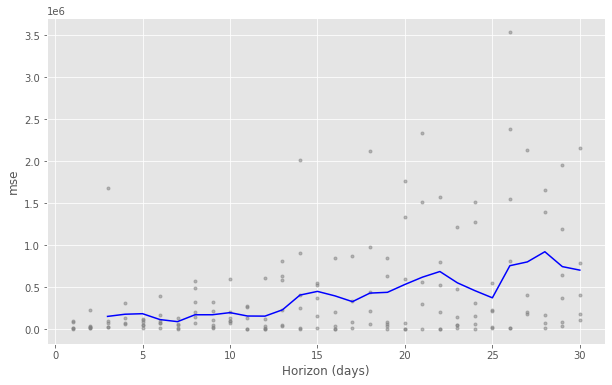

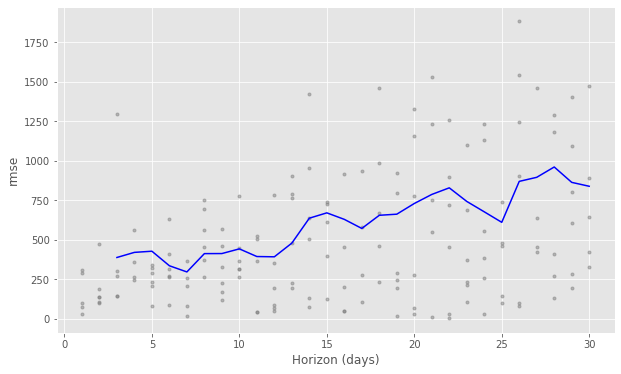

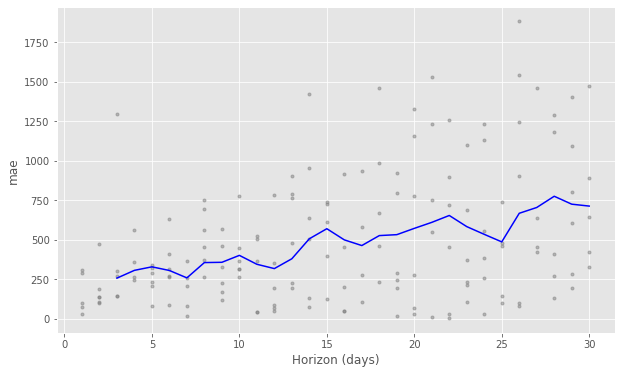

In [141]:
#plotando graficamente algumas performances
ax[0] = plot_cross_validation_metric(df_cv, 'mse')
ax[1] = plot_cross_validation_metric(df_cv, 'rmse')
ax[2] = plot_cross_validation_metric(df_cv, 'mae')

plt.plot()

##Conclusão do módulo:


---

Nesse módulo aprendemos a analisar séries temporais, desde entender se são exponenciais ou não até como fazer previsão com elas, ao longo do módulo fizemos diversas anotações de como entender as series e suas nuances.

Aprendemos também sobre a biblioteca Facebook Prophet que é simples de ser usada e ao mesmo tempo muito poderosa para prever series temporais e construir modelos para elas.